In [1]:
import csv
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dss = ['mnist', 'fashion_mnist', 'cifar10', 'cifar100', 'stl10']
colors = {'mnist':'b',
          'fashion_mnist': 'g',
          'cifar10': 'r',
          'cifar100': 'c',
          'stl10': 'm'}
ds_pretty_names = {'mnist':'MNIST',
                   'fashion_mnist': 'Fashion-MNIST',
                   'cifar10': 'CIFAR-10',
                   'cifar100': 'CIFAR-100',
                   'stl10': 'STL-10'}
num_epochs = 100 

fontsize = 25

epochs_header = ['epoch', 
                 'accuracy', 
                 'precision (micro)', 'precision (macro)', 'precision (weighted)', 
                 'recall (micro)', 'recall (macro)', 'recall (weighted)', 
                 'f1-measure (micro)', 'f1-measure (macro)', 'f1-measure (weighted)', 
                 'validation f1-measure (micro)', 'validation f1-measure (macro)', 'validation f1-measure (weighted)', 
                 'train f1-measure (micro)', 'train f1-measure (macro)', 'train f1-measure (weighted)', 
                 'loss', 'validation loss', 'train loss']
epochs_header = {field: i for i, field in enumerate(epochs_header)}
                 
meta_header   = ['model',
                 'num. layers',
                 'num. heads',
                 'stopped-at',
                 'n_segments', 
                 'compactness', 
                 'graph type', 
                 'slic method',
                 'features', 
                 'avg. num. of nodes', 
                 'std. dev. of num. of nodes', 
                 'avg. num. of edges', 
                 'std. dev. of num. of edges', 
                 'best epochs',
                 'last epochs',
                 'accuracy', 'stdv accuracy', 
                 'precision micro', 'stdv precision micro',
                 'precision macro', 'stdv precision macro',
                 'precision weighted', 'stdv precision weighted',
                 'recall micro', 'stdv recall micro',
                 'recall macro', 'stdv recall macro',
                 'recall weighted', 'stdv recall weighted',
                 'f1 micro', 'stdv f1 micro', 
                 'f1 macro', 'stdv f1 macro',
                 'f1 weighted', 'stdv f1 weighted', 
                 'validation f1 micro', 'stdv validation f1 micro', 
                 'validation f1 macro', 'stdv validation f1 macro',
                 'validation f1 weighted', 'stdv validation f1 weighted', 
                 'train f1 micro', 'stdv train f1 micro', 
                 'train f1 macro', 'stdv train f1 macro',
                 'train f1 weighted', 'stdv train f1 weighted', 
                 'loss', 'stdv loss', 
                 'validation loss', 'stdv validation loss', 
                 'train loss', 'stdv train loss', 
                 'training time', 'stdv training time',
                 'loading time', 'stdv loading time']
meta_header = {field: i for i, field in enumerate(meta_header)}

# GCN tests

## Features

In [4]:
grey_dss = dss[0:2]
color_dss = dss[2:]
features_grey  = [['avg_color'],
                  ['avg_color','centroid'],
                  ['avg_color','centroid','std_deviation_color'],
                  ['avg_color','centroid','std_deviation_color','num_pixels'],
                  ['avg_color','centroid','std_deviation_color','std_deviation_centroid']]
features_color = [['avg_color'],
                  ['avg_color','centroid'],
                  ['avg_color','centroid','std_deviation_color'],
                  ['avg_color','centroid','std_deviation_color','num_pixels'],
                  ['avg_color','centroid','std_deviation_color','std_deviation_centroid'],
                  ['avg_color','centroid','std_deviation_color','std_deviation_centroid','avg_color_hsv'],
                  ['avg_color','centroid','std_deviation_color','std_deviation_centroid','avg_color_hsv','std_deviation_color_hsv']]
features_pretty = ['avg. color',
                  'avg. color + centroid', 
                  'avg. color + centroid + std. dev. color', 
                  'avg. color + centroid + std. dev. color \n + num. pixels', 
                  'avg. color + centroid + std. dev. color \n + std. dev. centroid', 
                  'avg. color + centroid + std. dev. color \n + std. dev. centroid + avg. color hsv',
                  'avg. color + centroid + std. dev. color \n + std. dev. centroid + avg. color hsv\n + std. dev. color hsv']

In [22]:
colors = plt.rcParams['axes.prop_cycle']

### Epoch averages 

In [5]:
data_grey  = np.ndarray((len(grey_dss), len(features_grey), len(epochs_header), num_epochs), dtype=np.float64)
data_color = np.ndarray((len(color_dss), len(features_color), len(epochs_header), num_epochs), dtype=np.float64)

def load_data(datasets, features, data_arr):
    for dataset_index, dataset_name in enumerate(datasets):
        basedir = f'GCN/{dataset_name}/'
        for features_idx, features_list in enumerate(features):
            features_list.sort()
            filename = 'l3n75-RAG-SLIC0-{}.csv'.format('-'.join(features_list))
            with open(basedir + filename, newline='') as file:
                reader = csv.reader(file)
                for epoch_idx, epoch_info in enumerate(reader):
                    if epoch_idx > 0:
                        for v_idx, v in enumerate(epoch_info):
                            if v != '':
                                data_arr[dataset_index][features_idx][v_idx][epoch_idx - 1] = float(v)
                            else:
                                data_arr[dataset_index][features_idx][v_idx][epoch_idx - 1] = np.nan

load_data(grey_dss, features_grey, data_grey)
load_data(color_dss, features_color, data_color)

In [83]:
from matplotlib.lines import Line2D

In [119]:
def single_plot_all_color(ds, dsi, metric, y=0.51):
    es = range(num_epochs)
    fig, ax = plt.subplots(figsize=(10,8))
    for fi, _ in enumerate(features_color):
        fline, = plt.plot(es, data_color[dsi, fi, epochs_header[f'{metric}'],:], label=features_pretty[fi])
        plt.plot(es, data_color[dsi, fi, epochs_header[f'validation {metric}'],:],
                color=fline.get_color(), 
                linestyle='--' )
        plt.plot(es, data_color[dsi, fi, epochs_header[f'train {metric}'],:], 
                color=fline.get_color(), 
                linestyle=':' )
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.legend()
    legend_lines = [Line2D([0], [0], color='k'),
                    Line2D([0], [0], color='k', linestyle='--'),
                    Line2D([0], [0], color='k', linestyle=':')]
    fig.legend(legend_lines, [f'test {metric}', f'validation {metric}', f'train {metric}'], bbox_to_anchor=(1 - 0.1, y))
    fig.suptitle(f'{ds_pretty_names[ds]}: {metric}', y=0.9)
    plt.savefig(f'imgs/features-{ds}-{metric}-all.png', bbox_inches='tight')
    plt.show()

In [124]:
def single_plot_all_grey(ds, dsi, metric, y=0.45):
    es = range(num_epochs)
    fig, ax = plt.subplots(figsize=(10,7))
    for fi, _ in enumerate(features_grey):
        fline, = plt.plot(es, data_grey[dsi, fi, epochs_header[f'{metric}'],:], label=features_pretty[fi])
        plt.plot(es, data_grey[dsi, fi, epochs_header[f'validation {metric}'],:],
                color=fline.get_color(), 
                linestyle='--' )
        plt.plot(es, data_grey[dsi, fi, epochs_header[f'train {metric}'],:], 
                color=fline.get_color(), 
                linestyle=':' )
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.legend()
    legend_lines = [Line2D([0], [0], color='k'),
                    Line2D([0], [0], color='k', linestyle='--'),
                    Line2D([0], [0], color='k', linestyle=':')]
    fig.legend(legend_lines, ['Test F1', 'Validation F1', 'Train F1'], bbox_to_anchor=(1 - 0.1, y))
    fig.suptitle(ds_pretty_names[ds], y=0.9)
    plt.show()

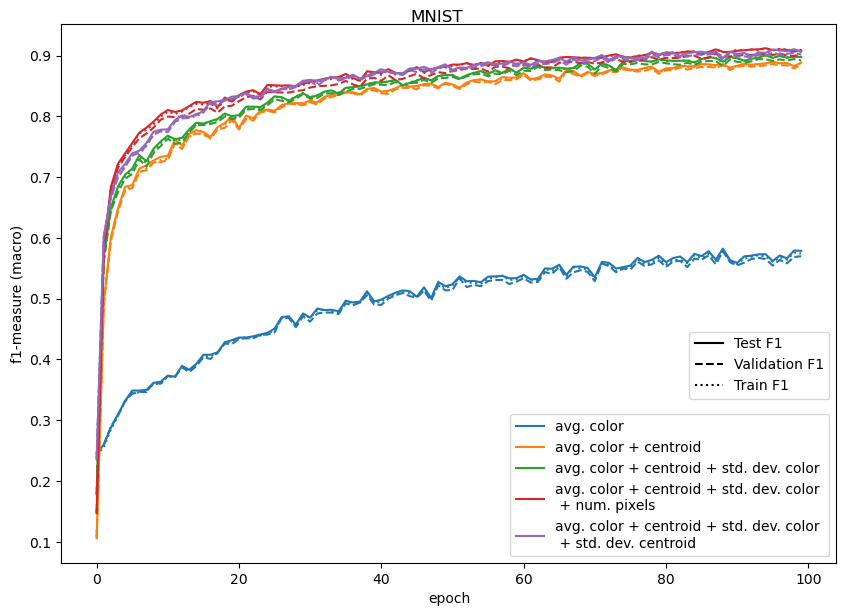

In [122]:
single_plot_all_grey('mnist', 0, 'f1-measure (macro)', y=0.45)

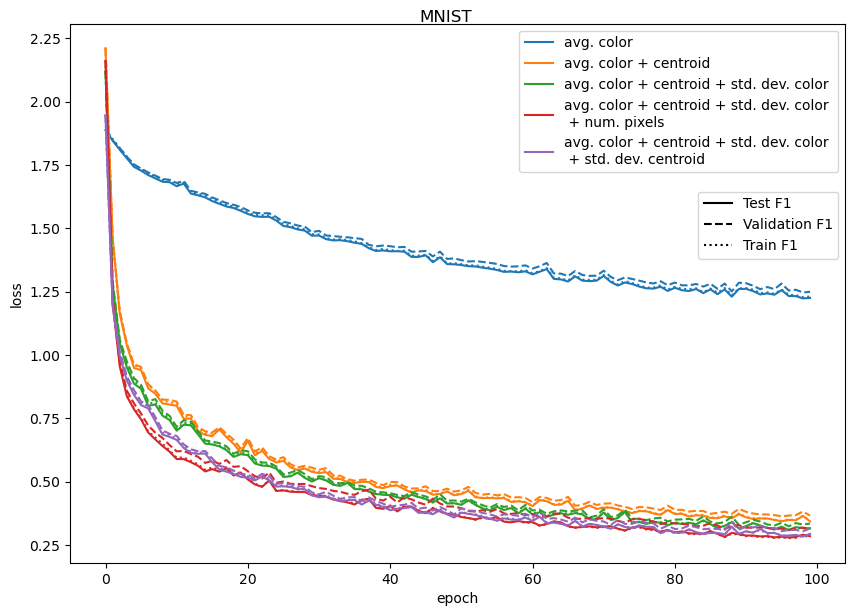

In [127]:
single_plot_all_grey('mnist', 0, 'loss', y=0.65)

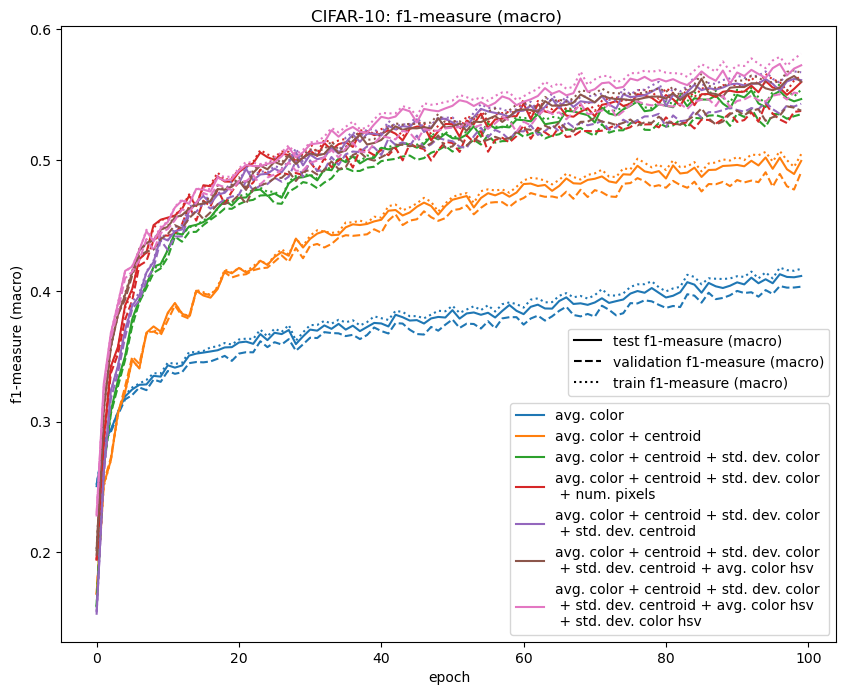

In [128]:
single_plot_all_color('cifar10', 0, 'f1-measure (macro)')

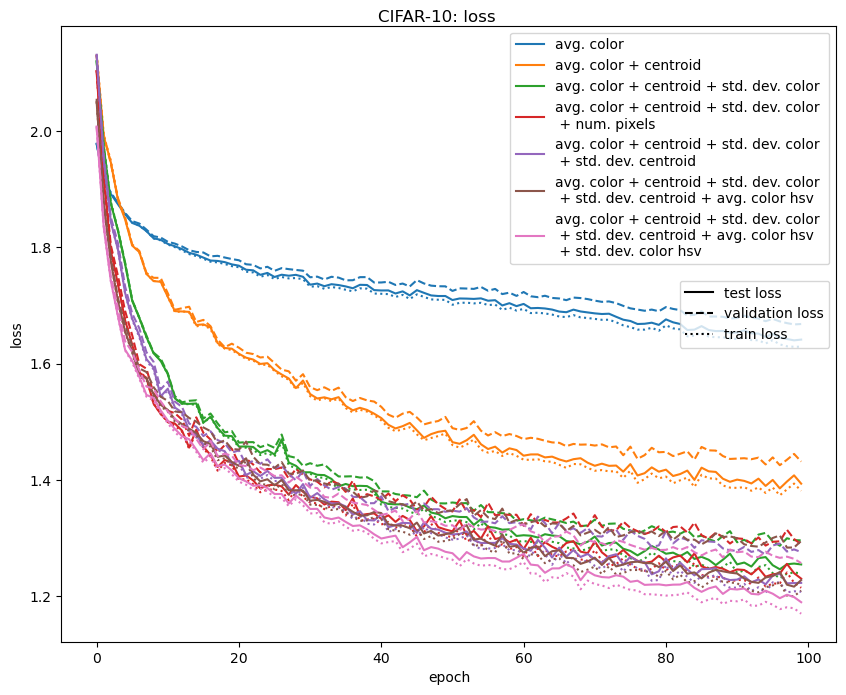

In [132]:
single_plot_all_color('cifar10', 0, 'loss', y=0.57)

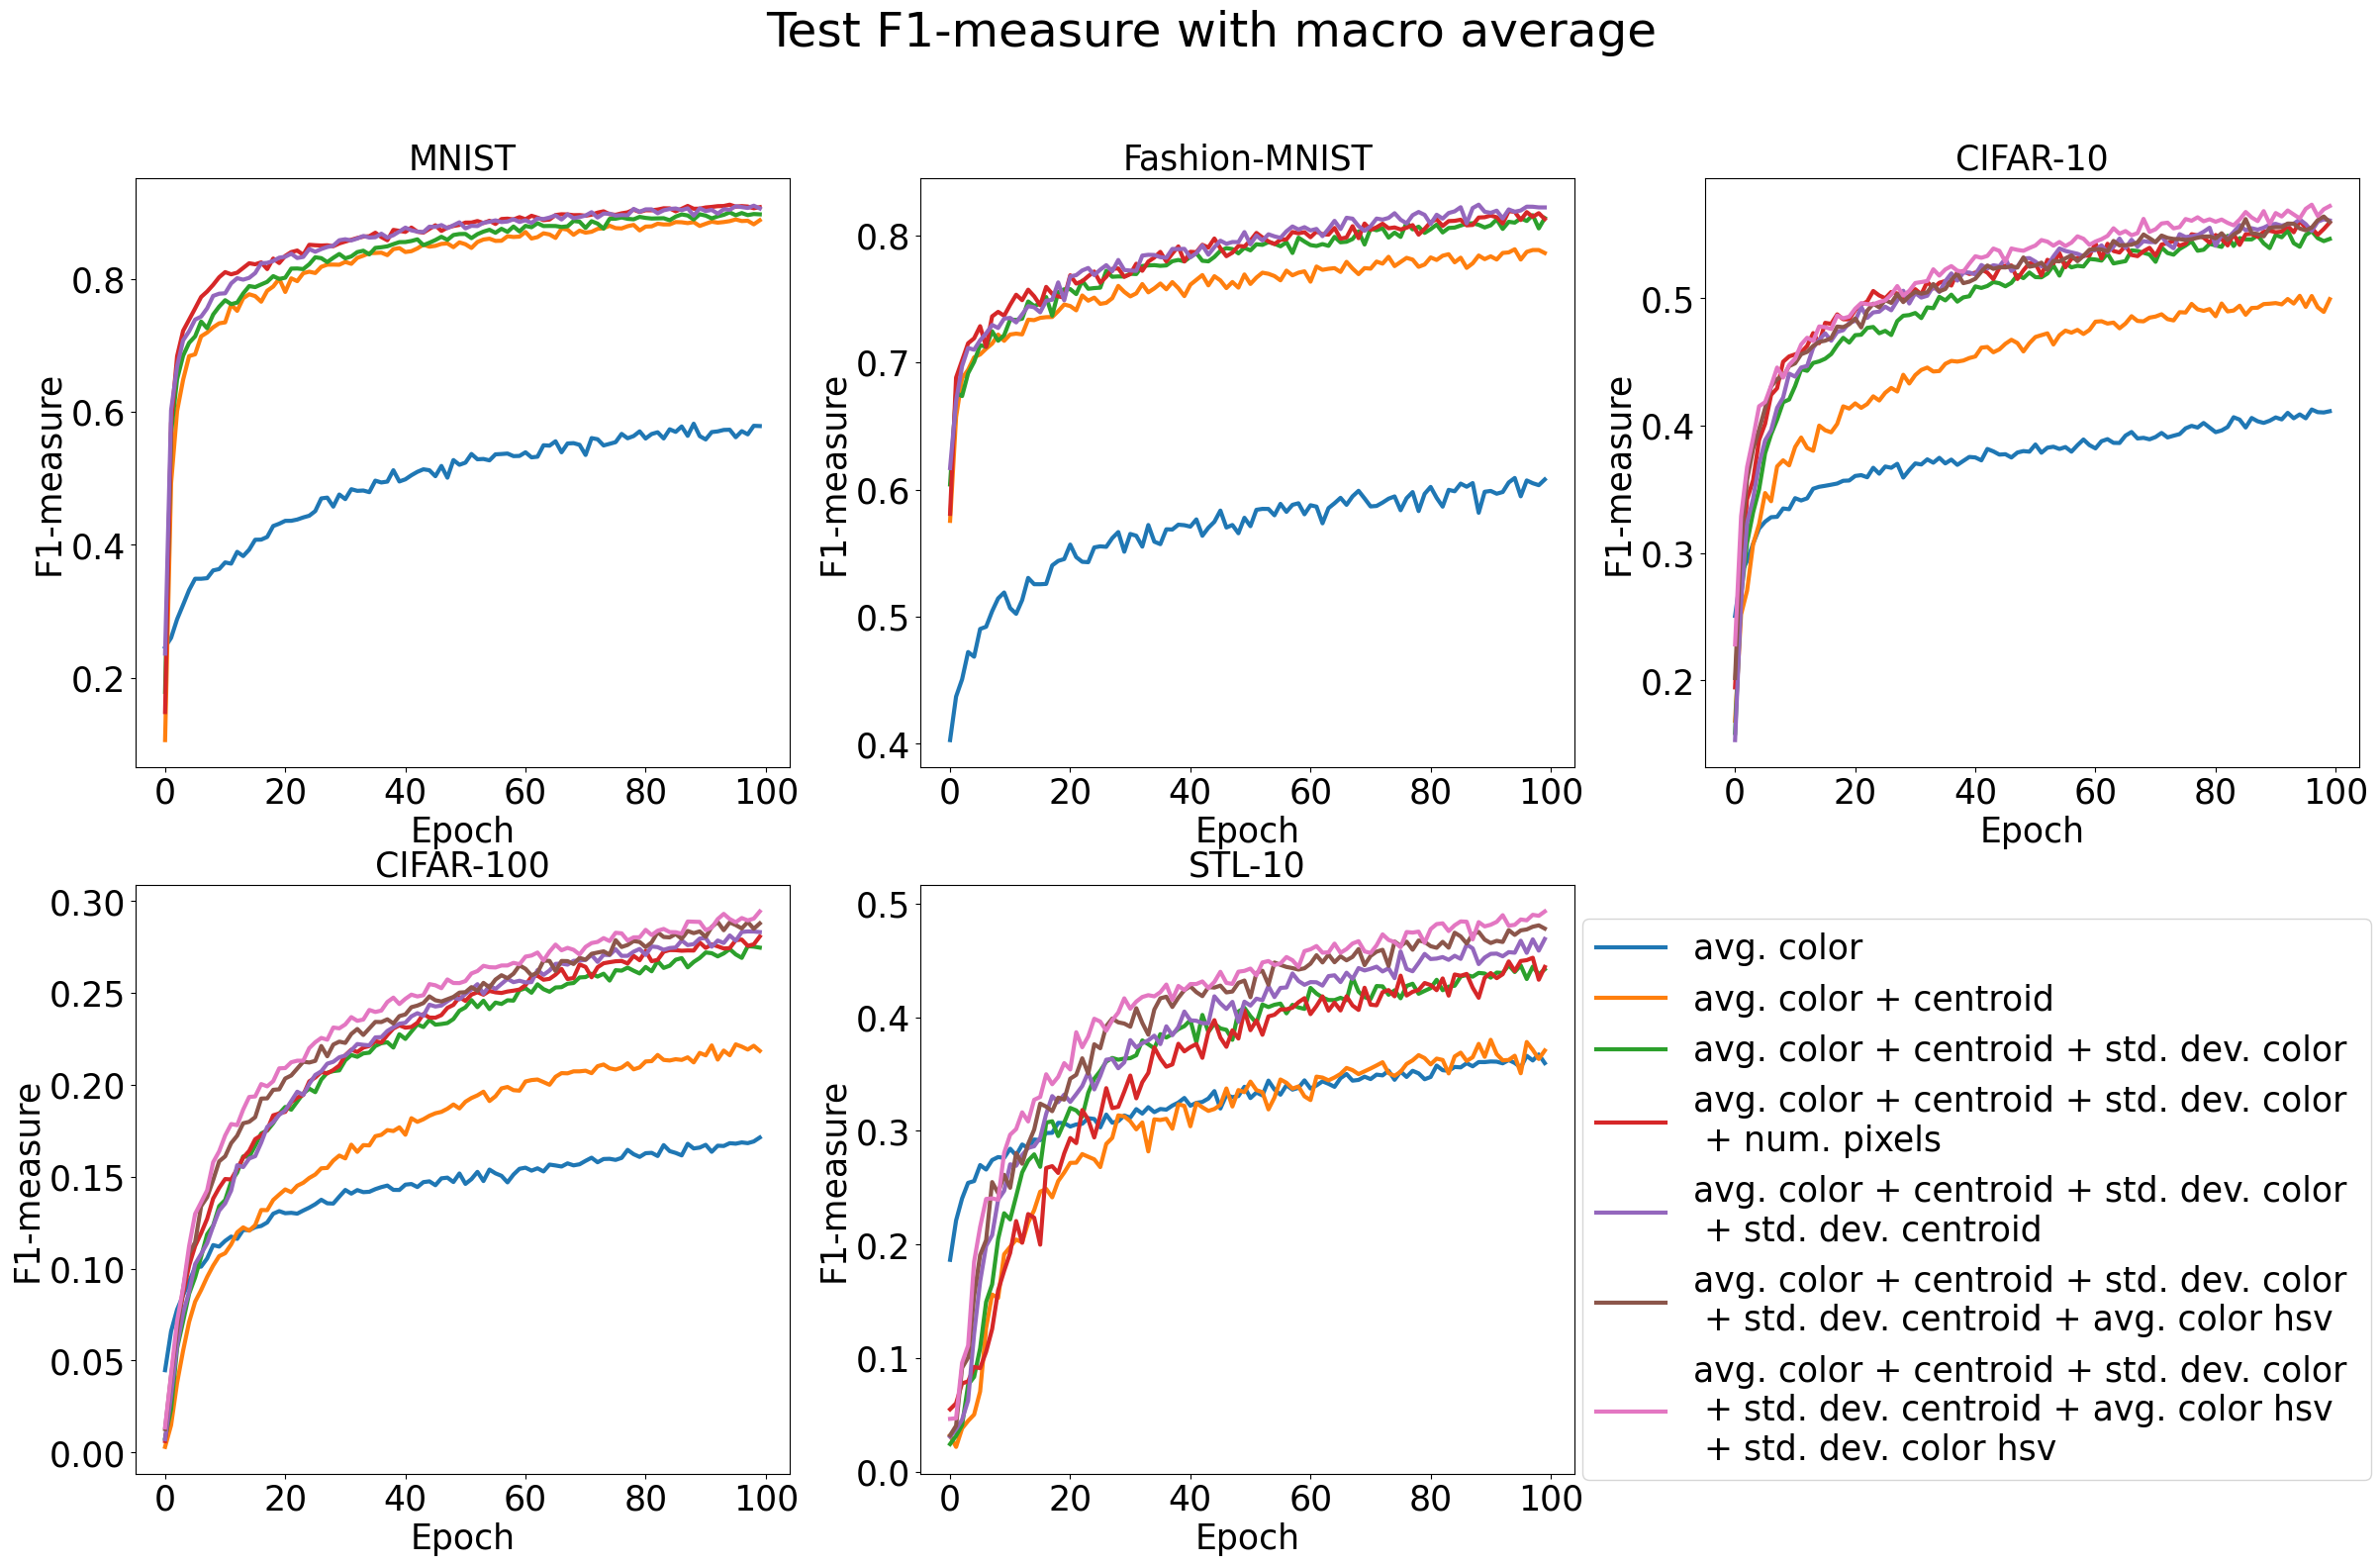

In [60]:
epochs = range(100)

rows, cols = 2, 3
figsize = (29, 17)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for dsi, ds in enumerate(dss):
    axi, axj = int(np.floor(dsi/cols)),  int(dsi % cols)
    grey_dsi = len(grey_dss)
    features = features_grey if dsi < grey_dsi else features_color
    data = data_grey if dsi < grey_dsi else data_color
    dataset_index_real = dsi if dsi < grey_dsi else dsi - grey_dsi
    ax[axi][axj].tick_params(labelsize=fontsize)
    for features_idx, features_name in enumerate(features):
        ax[axi][axj].set_xlabel('Epoch', fontsize=fontsize)
        ax[axi][axj].set_ylabel('F1-measure', fontsize=fontsize)
        ax[axi][axj].set_title(ds_pretty_names[ds], fontsize=fontsize)
        ax[axi][axj].plot(epochs, data[dataset_index_real][features_idx][epochs_header['f1-measure (macro)']], 
                          label=features_pretty[features_idx],
                          linewidth=3)
ax[rows-1][cols-1].remove()
handles, labels = ax[rows-1][cols-2].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1 - 0.09, 0.45), fontsize=fontsize)
fig.suptitle('Test F1-measure with macro average', fontsize=fontsize+10)
plt.savefig('imgs/features-f1-test.png', bbox_inches='tight')
plt.show()

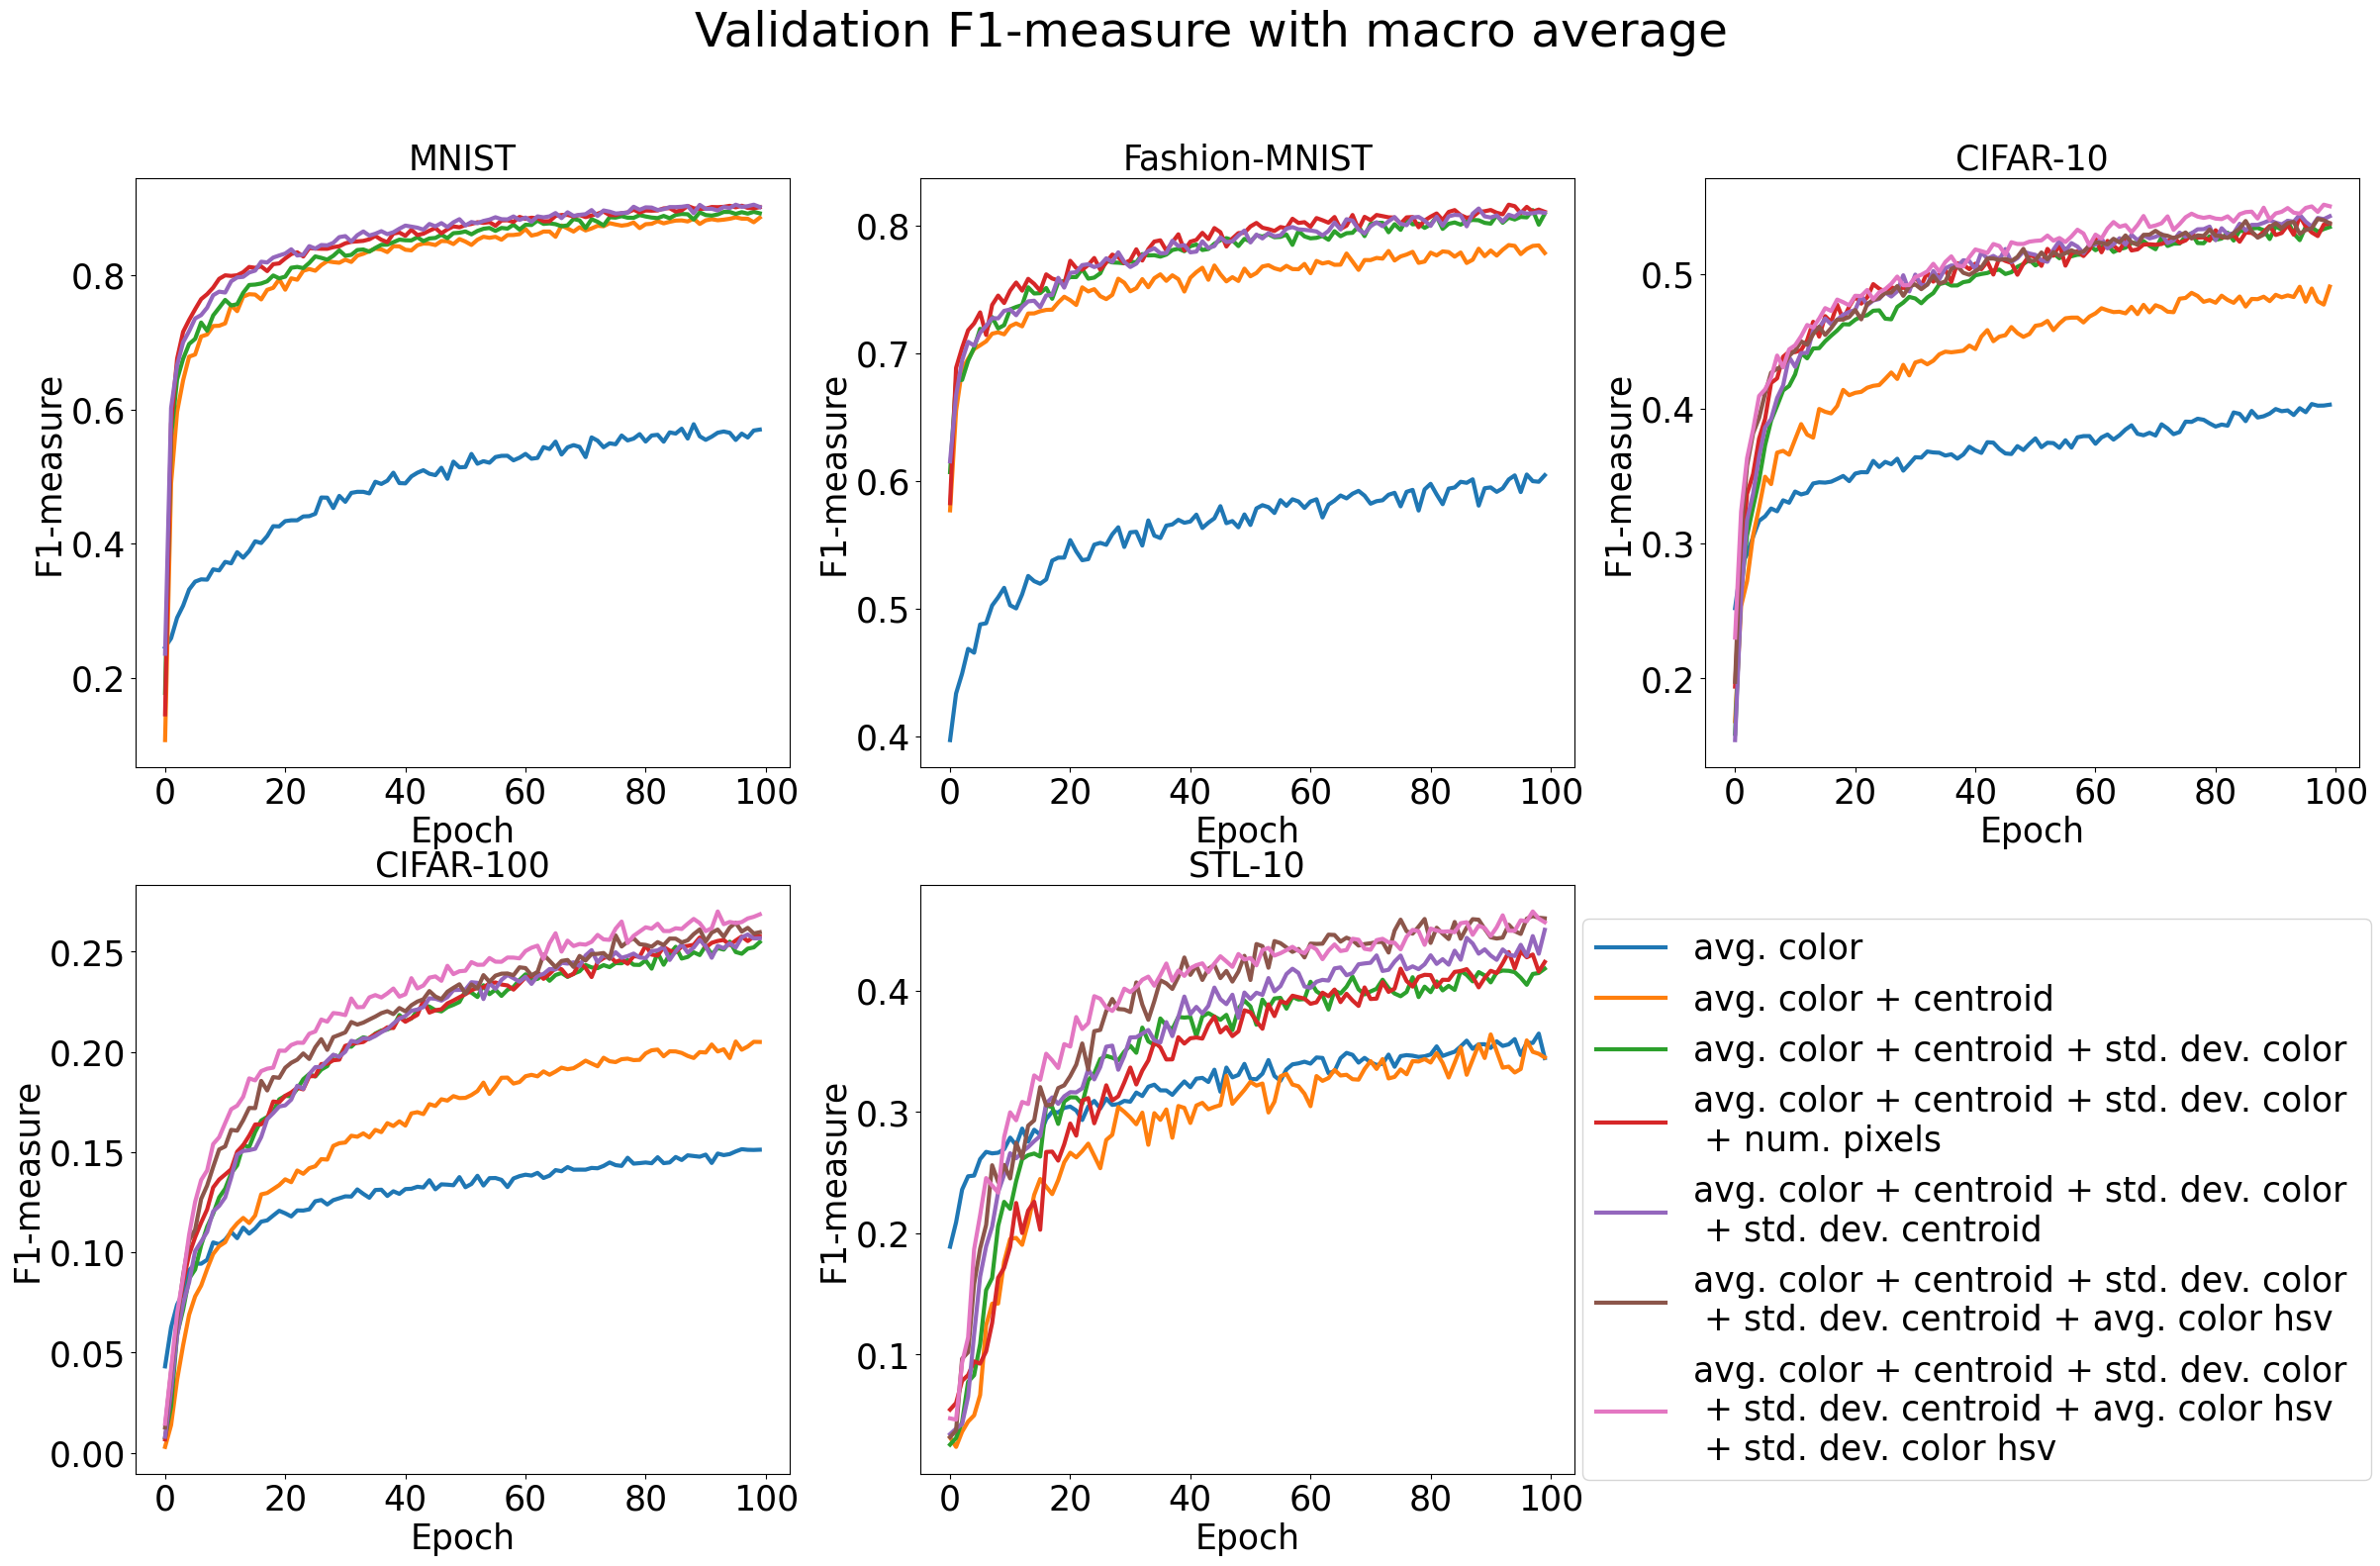

In [62]:
rows, cols = 2, 3
figsize = (29, 17)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for dsi, ds in enumerate(dss):
    axi, axj = int(np.floor(dsi/cols)),  int(dsi % cols)
    grey_dsi = len(grey_dss)
    features = features_grey if dsi < grey_dsi else features_color
    data = data_grey if dsi < grey_dsi else data_color
    dataset_index_real = dsi if dsi < grey_dsi else dsi - grey_dsi
    ax[axi][axj].tick_params(labelsize=fontsize)
    for features_idx, features_name in enumerate(features):
        ax[axi][axj].set_xlabel('Epoch', fontsize=fontsize)
        ax[axi][axj].set_ylabel('F1-measure', fontsize=fontsize)
        ax[axi][axj].set_title(ds_pretty_names[ds], fontsize=fontsize)
        ax[axi][axj].plot(epochs, data[dataset_index_real][features_idx][epochs_header['validation f1-measure (macro)']], 
                          label=features_pretty[features_idx],
                          linewidth=3)
ax[rows-1][cols-1].remove()
handles, labels = ax[rows-1][cols-2].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1 - 0.09, 0.45), fontsize=fontsize)
fig.suptitle('Validation F1-measure with macro average', fontsize=fontsize+10)
plt.savefig('imgs/features-f1-validation.png', bbox_inches='tight')
plt.show()

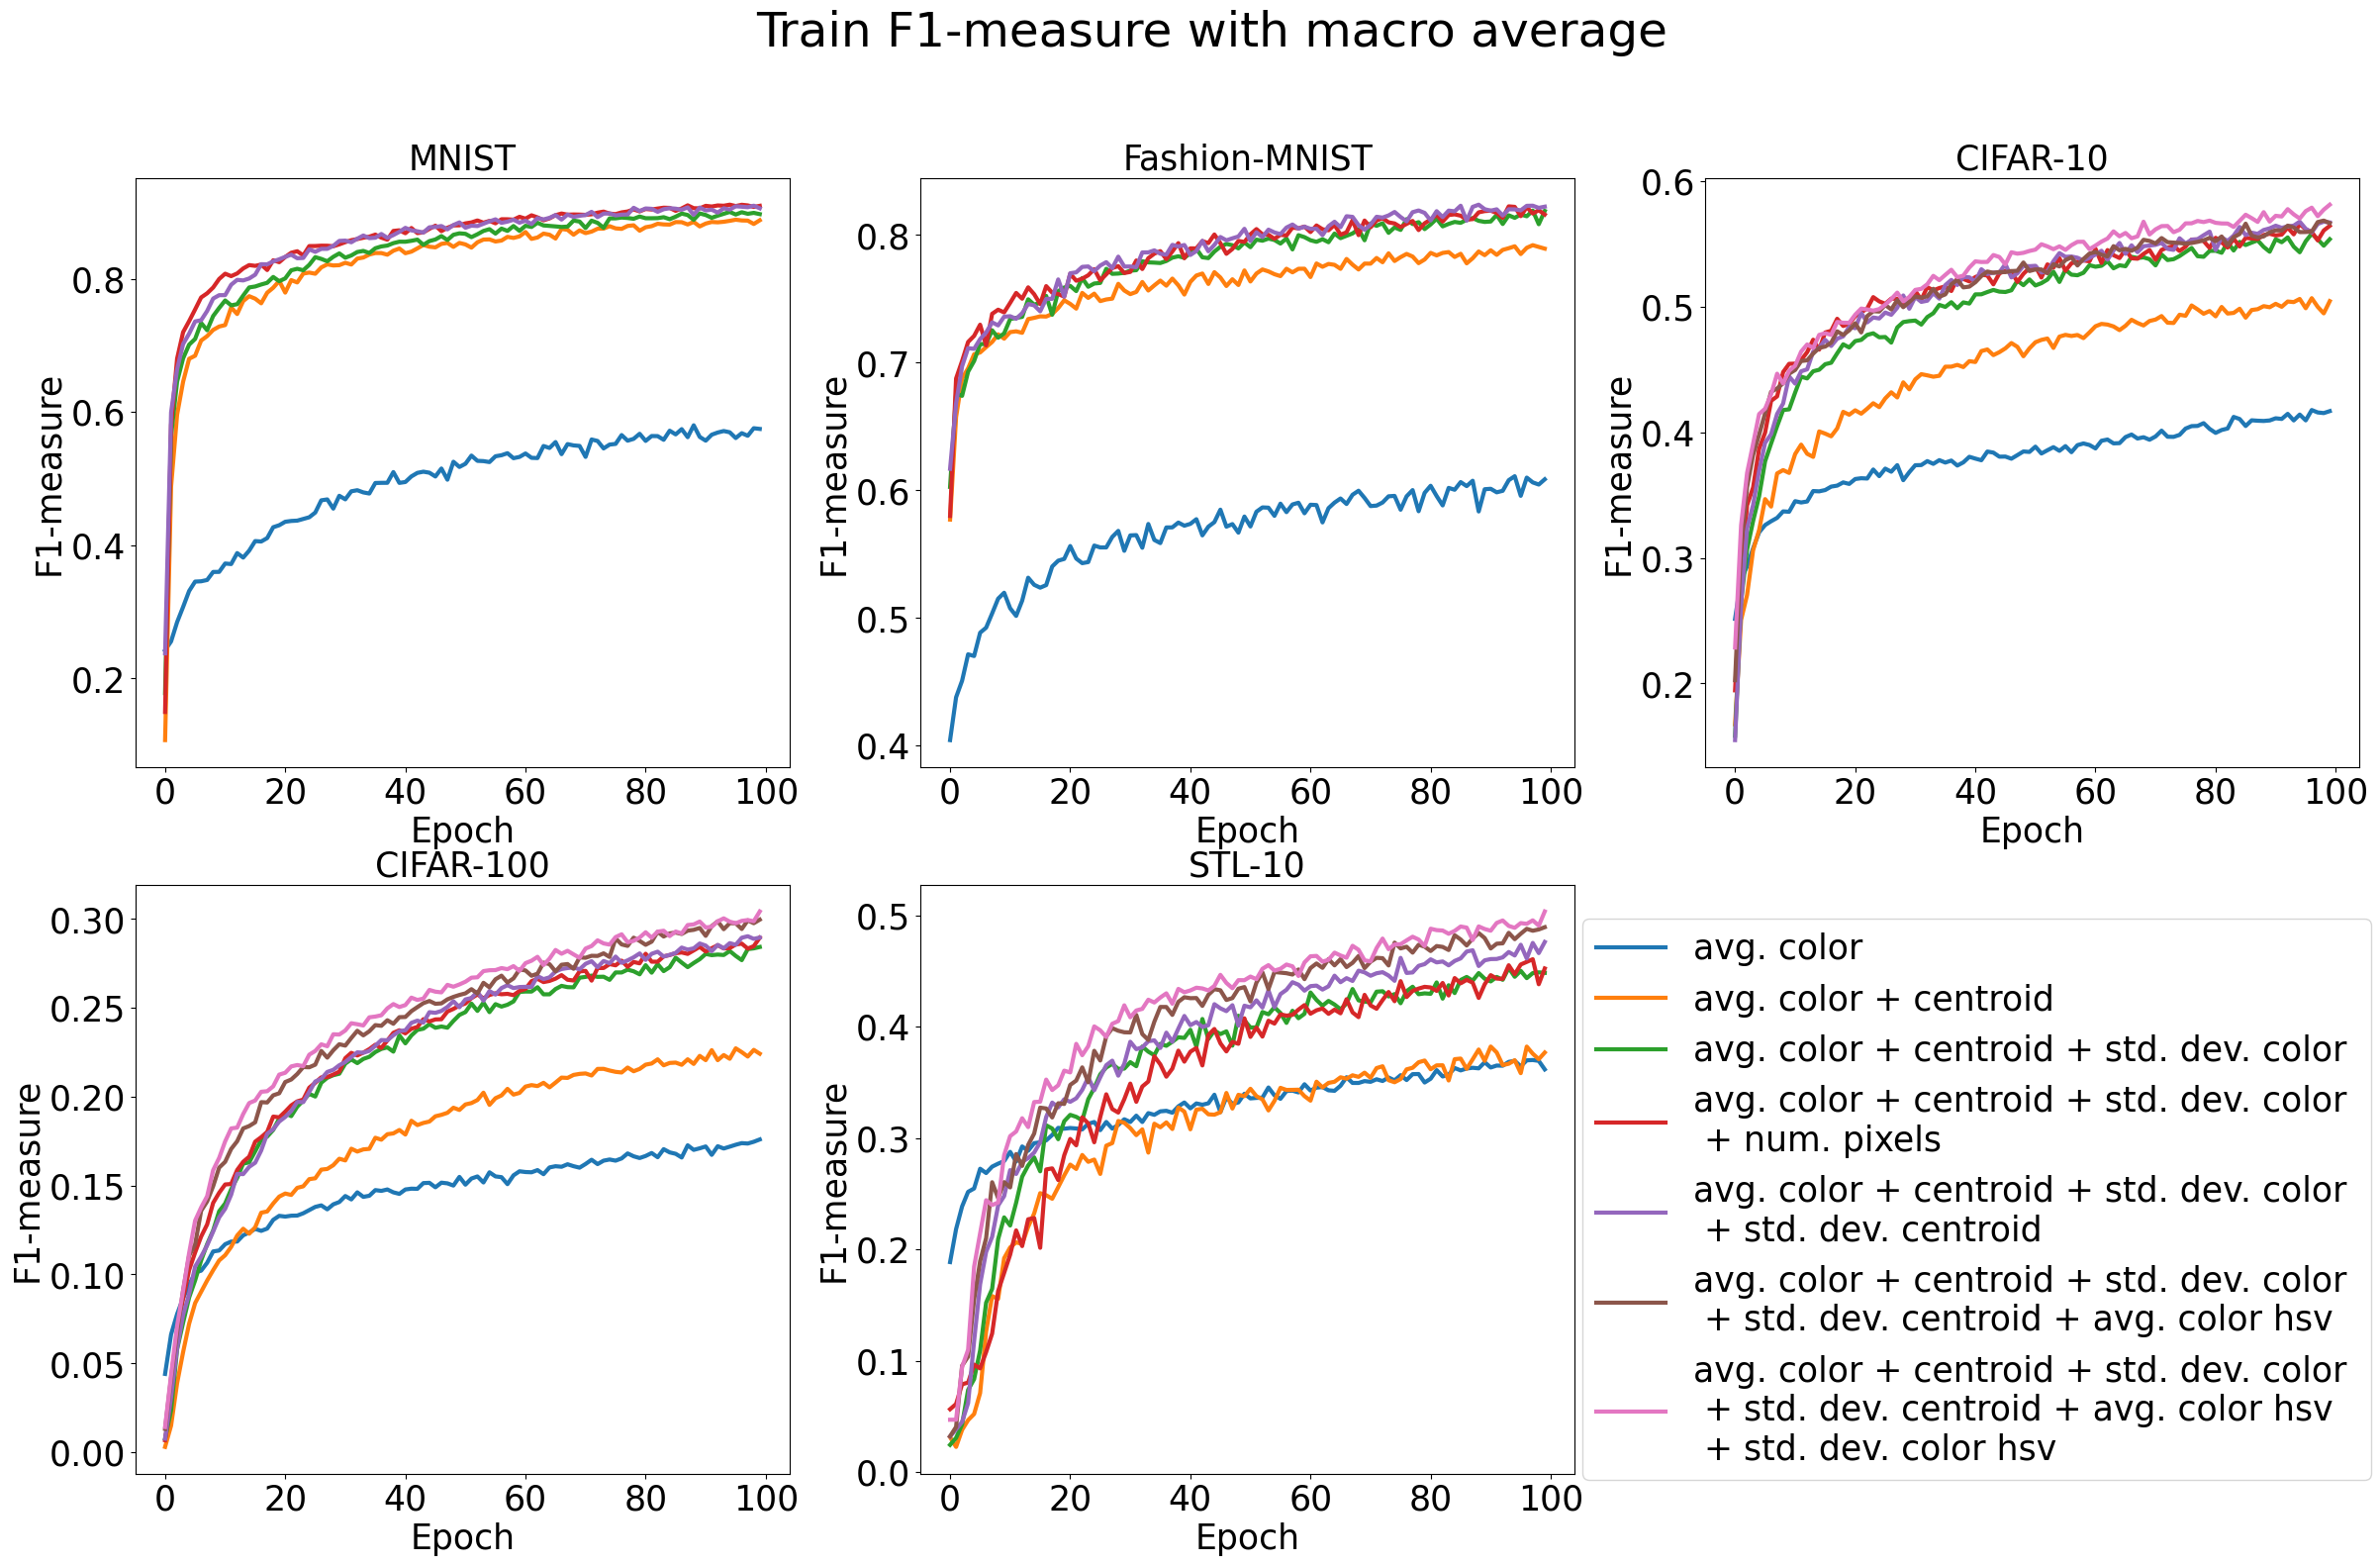

In [64]:
rows, cols = 2, 3
figsize = (29, 17)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for dsi, ds in enumerate(dss):
    axi, axj = int(np.floor(dsi/cols)),  int(dsi % cols)
    grey_dsi = len(grey_dss)
    features = features_grey if dsi < grey_dsi else features_color
    data = data_grey if dsi < grey_dsi else data_color
    dataset_index_real = dsi if dsi < grey_dsi else dsi - grey_dsi
    ax[axi][axj].tick_params(labelsize=fontsize)
    for features_idx, features_name in enumerate(features):
        ax[axi][axj].set_xlabel('Epoch', fontsize=fontsize)
        ax[axi][axj].set_ylabel('F1-measure', fontsize=fontsize)
        ax[axi][axj].set_title(ds_pretty_names[ds], fontsize=fontsize)
        ax[axi][axj].plot(epochs, data[dataset_index_real][features_idx][epochs_header['train f1-measure (macro)']], 
                          label=features_pretty[features_idx],
                          linewidth=3)
ax[rows-1][cols-1].remove()
handles, labels = ax[rows-1][cols-2].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1 - 0.09, 0.45), fontsize=fontsize)
fig.suptitle('Train F1-measure with macro average', fontsize=fontsize+10)
plt.savefig('imgs/features-f1-train.png', bbox_inches='tight')
plt.show()

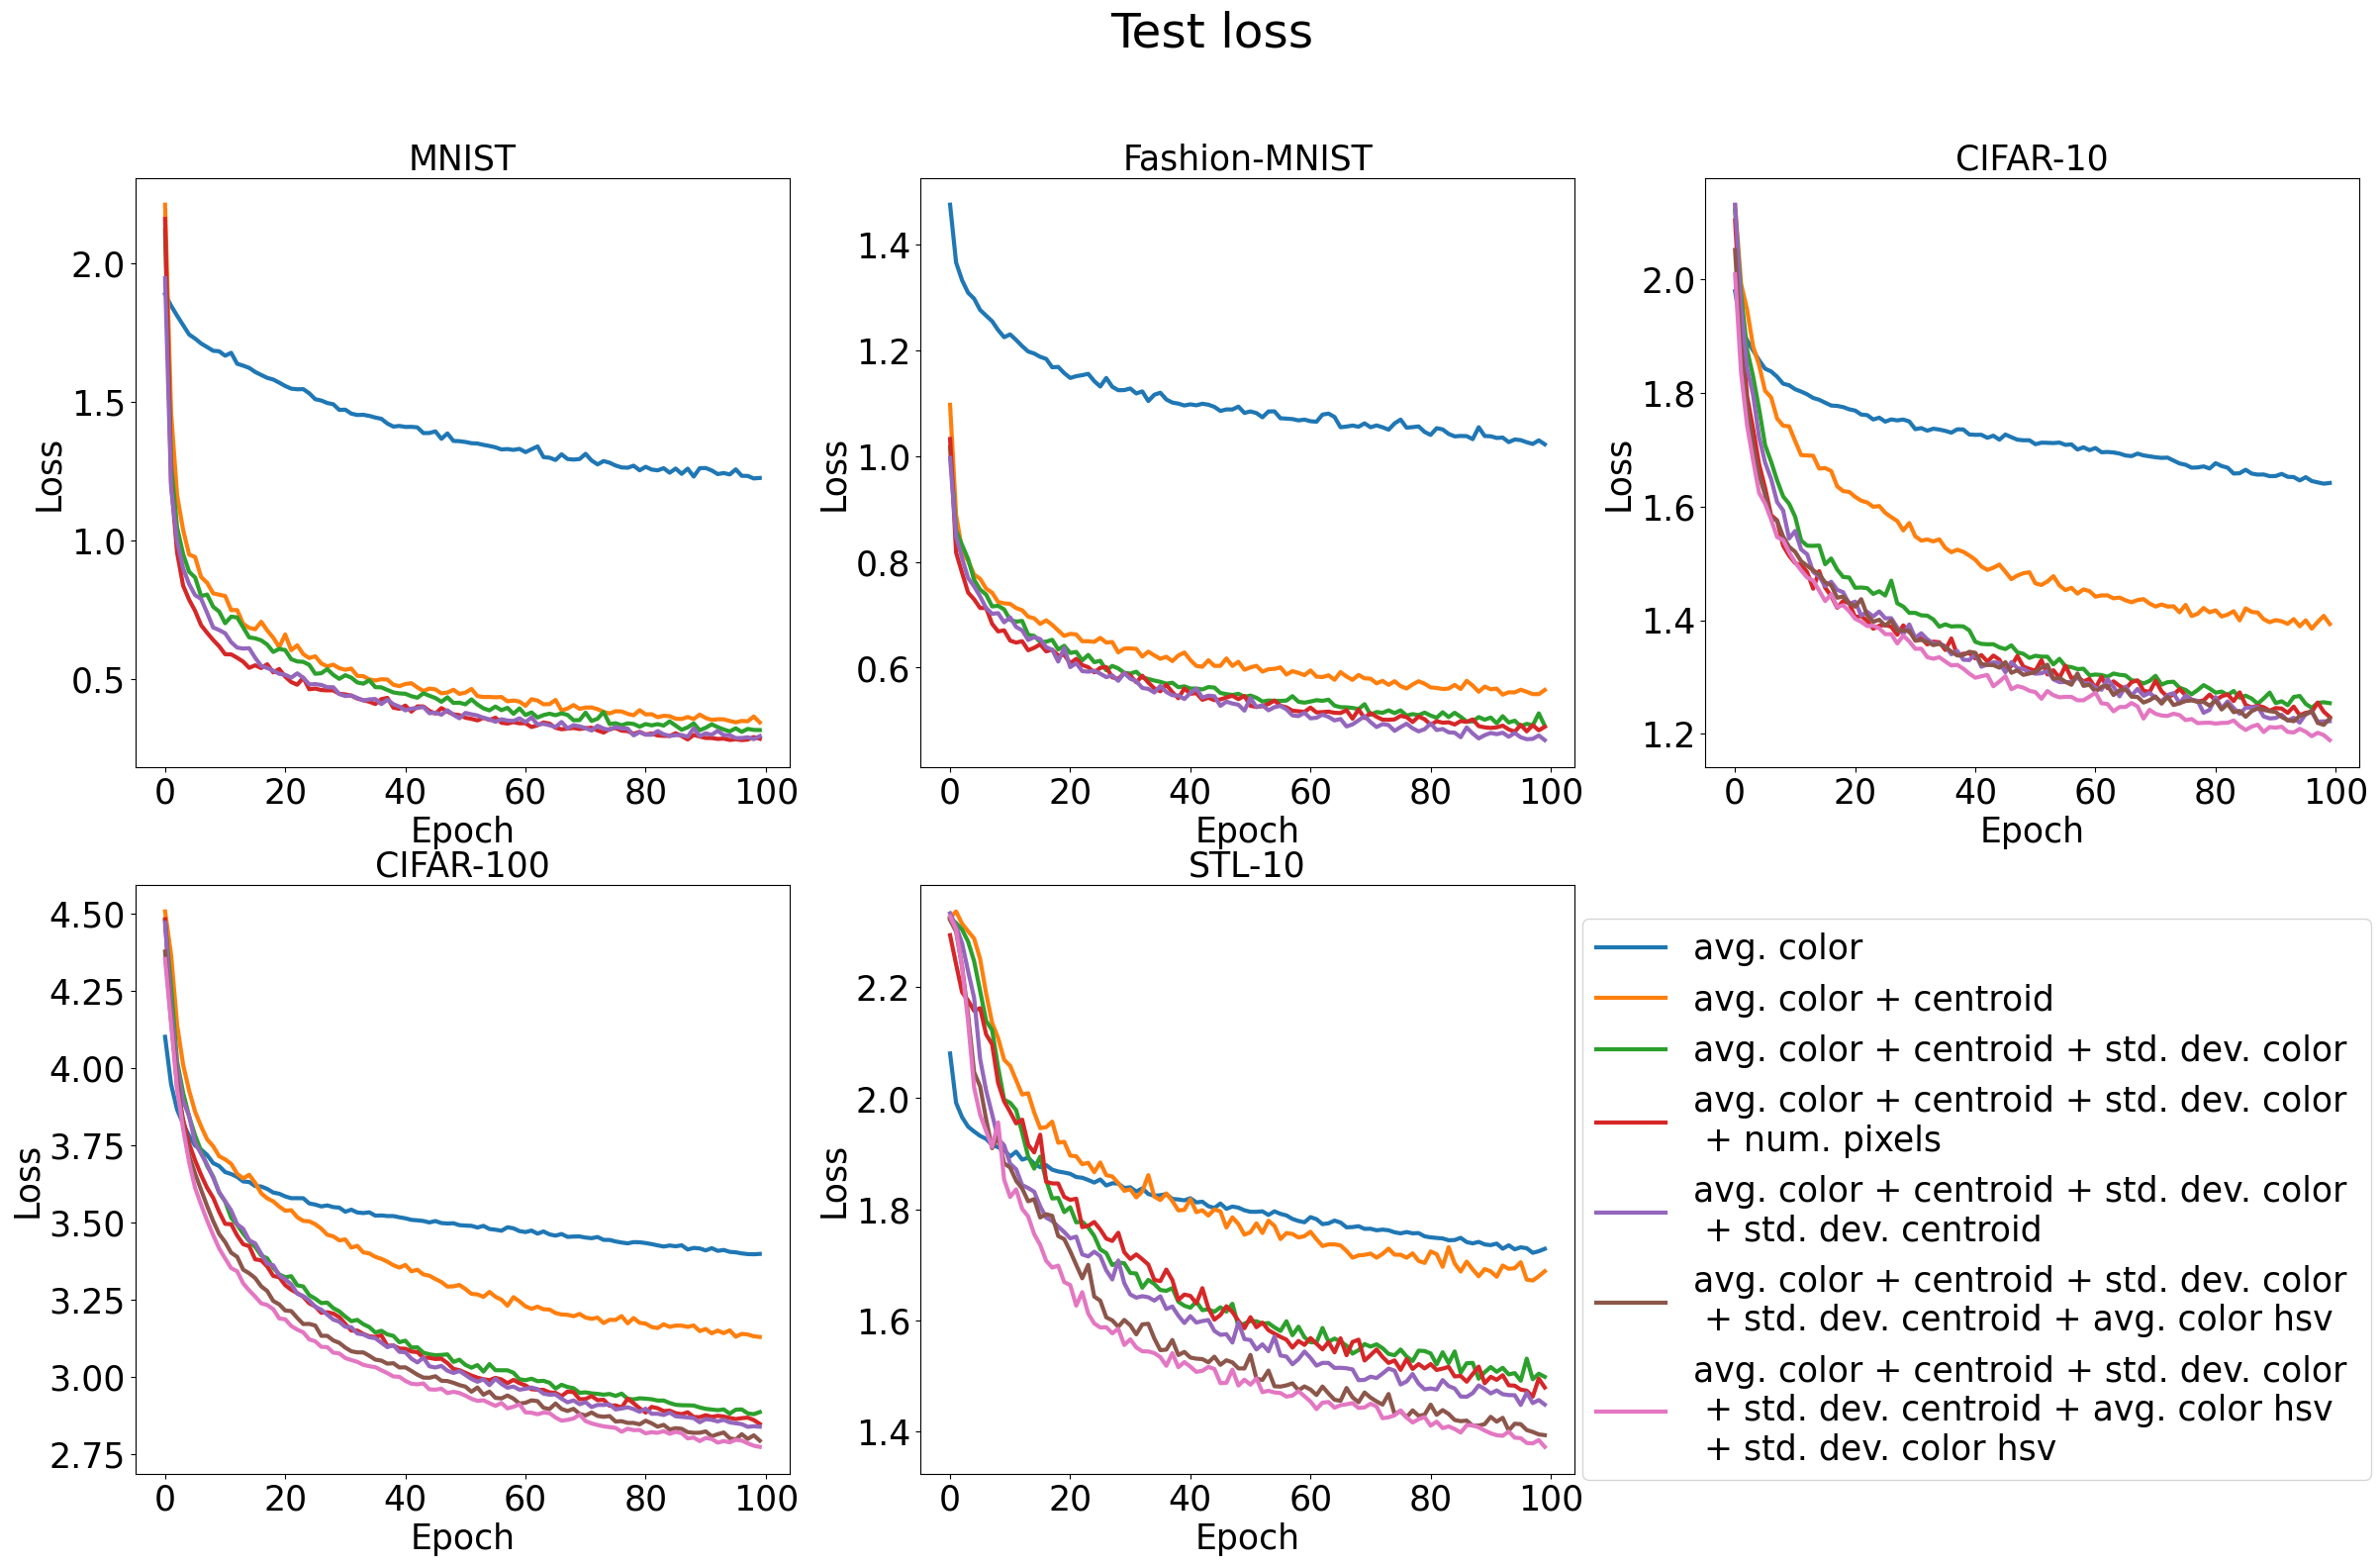

In [65]:
rows, cols = 2, 3
figsize = (29, 17)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for dsi, ds in enumerate(dss):
    axi, axj = int(np.floor(dsi/cols)),  int(dsi % cols)
    grey_dsi = len(grey_dss)
    features = features_grey if dsi < grey_dsi else features_color
    data = data_grey if dsi < grey_dsi else data_color
    dataset_index_real = dsi if dsi < grey_dsi else dsi - grey_dsi
    ax[axi][axj].tick_params(labelsize=fontsize)
    for features_idx, features_name in enumerate(features):
        ax[axi][axj].set_xlabel('Epoch', fontsize=fontsize)
        ax[axi][axj].set_ylabel('Loss', fontsize=fontsize)
        ax[axi][axj].set_title(ds_pretty_names[ds], fontsize=fontsize)
        ax[axi][axj].plot(epochs, data[dataset_index_real][features_idx][epochs_header['loss']], 
                          label=features_pretty[features_idx],
                          linewidth=3)
ax[rows-1][cols-1].remove()
handles, labels = ax[rows-1][cols-2].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1 - 0.09, 0.45), fontsize=fontsize)
fig.suptitle('Test loss', fontsize=fontsize+10)
plt.savefig('imgs/features-loss-test.png', bbox_inches='tight')
plt.show()

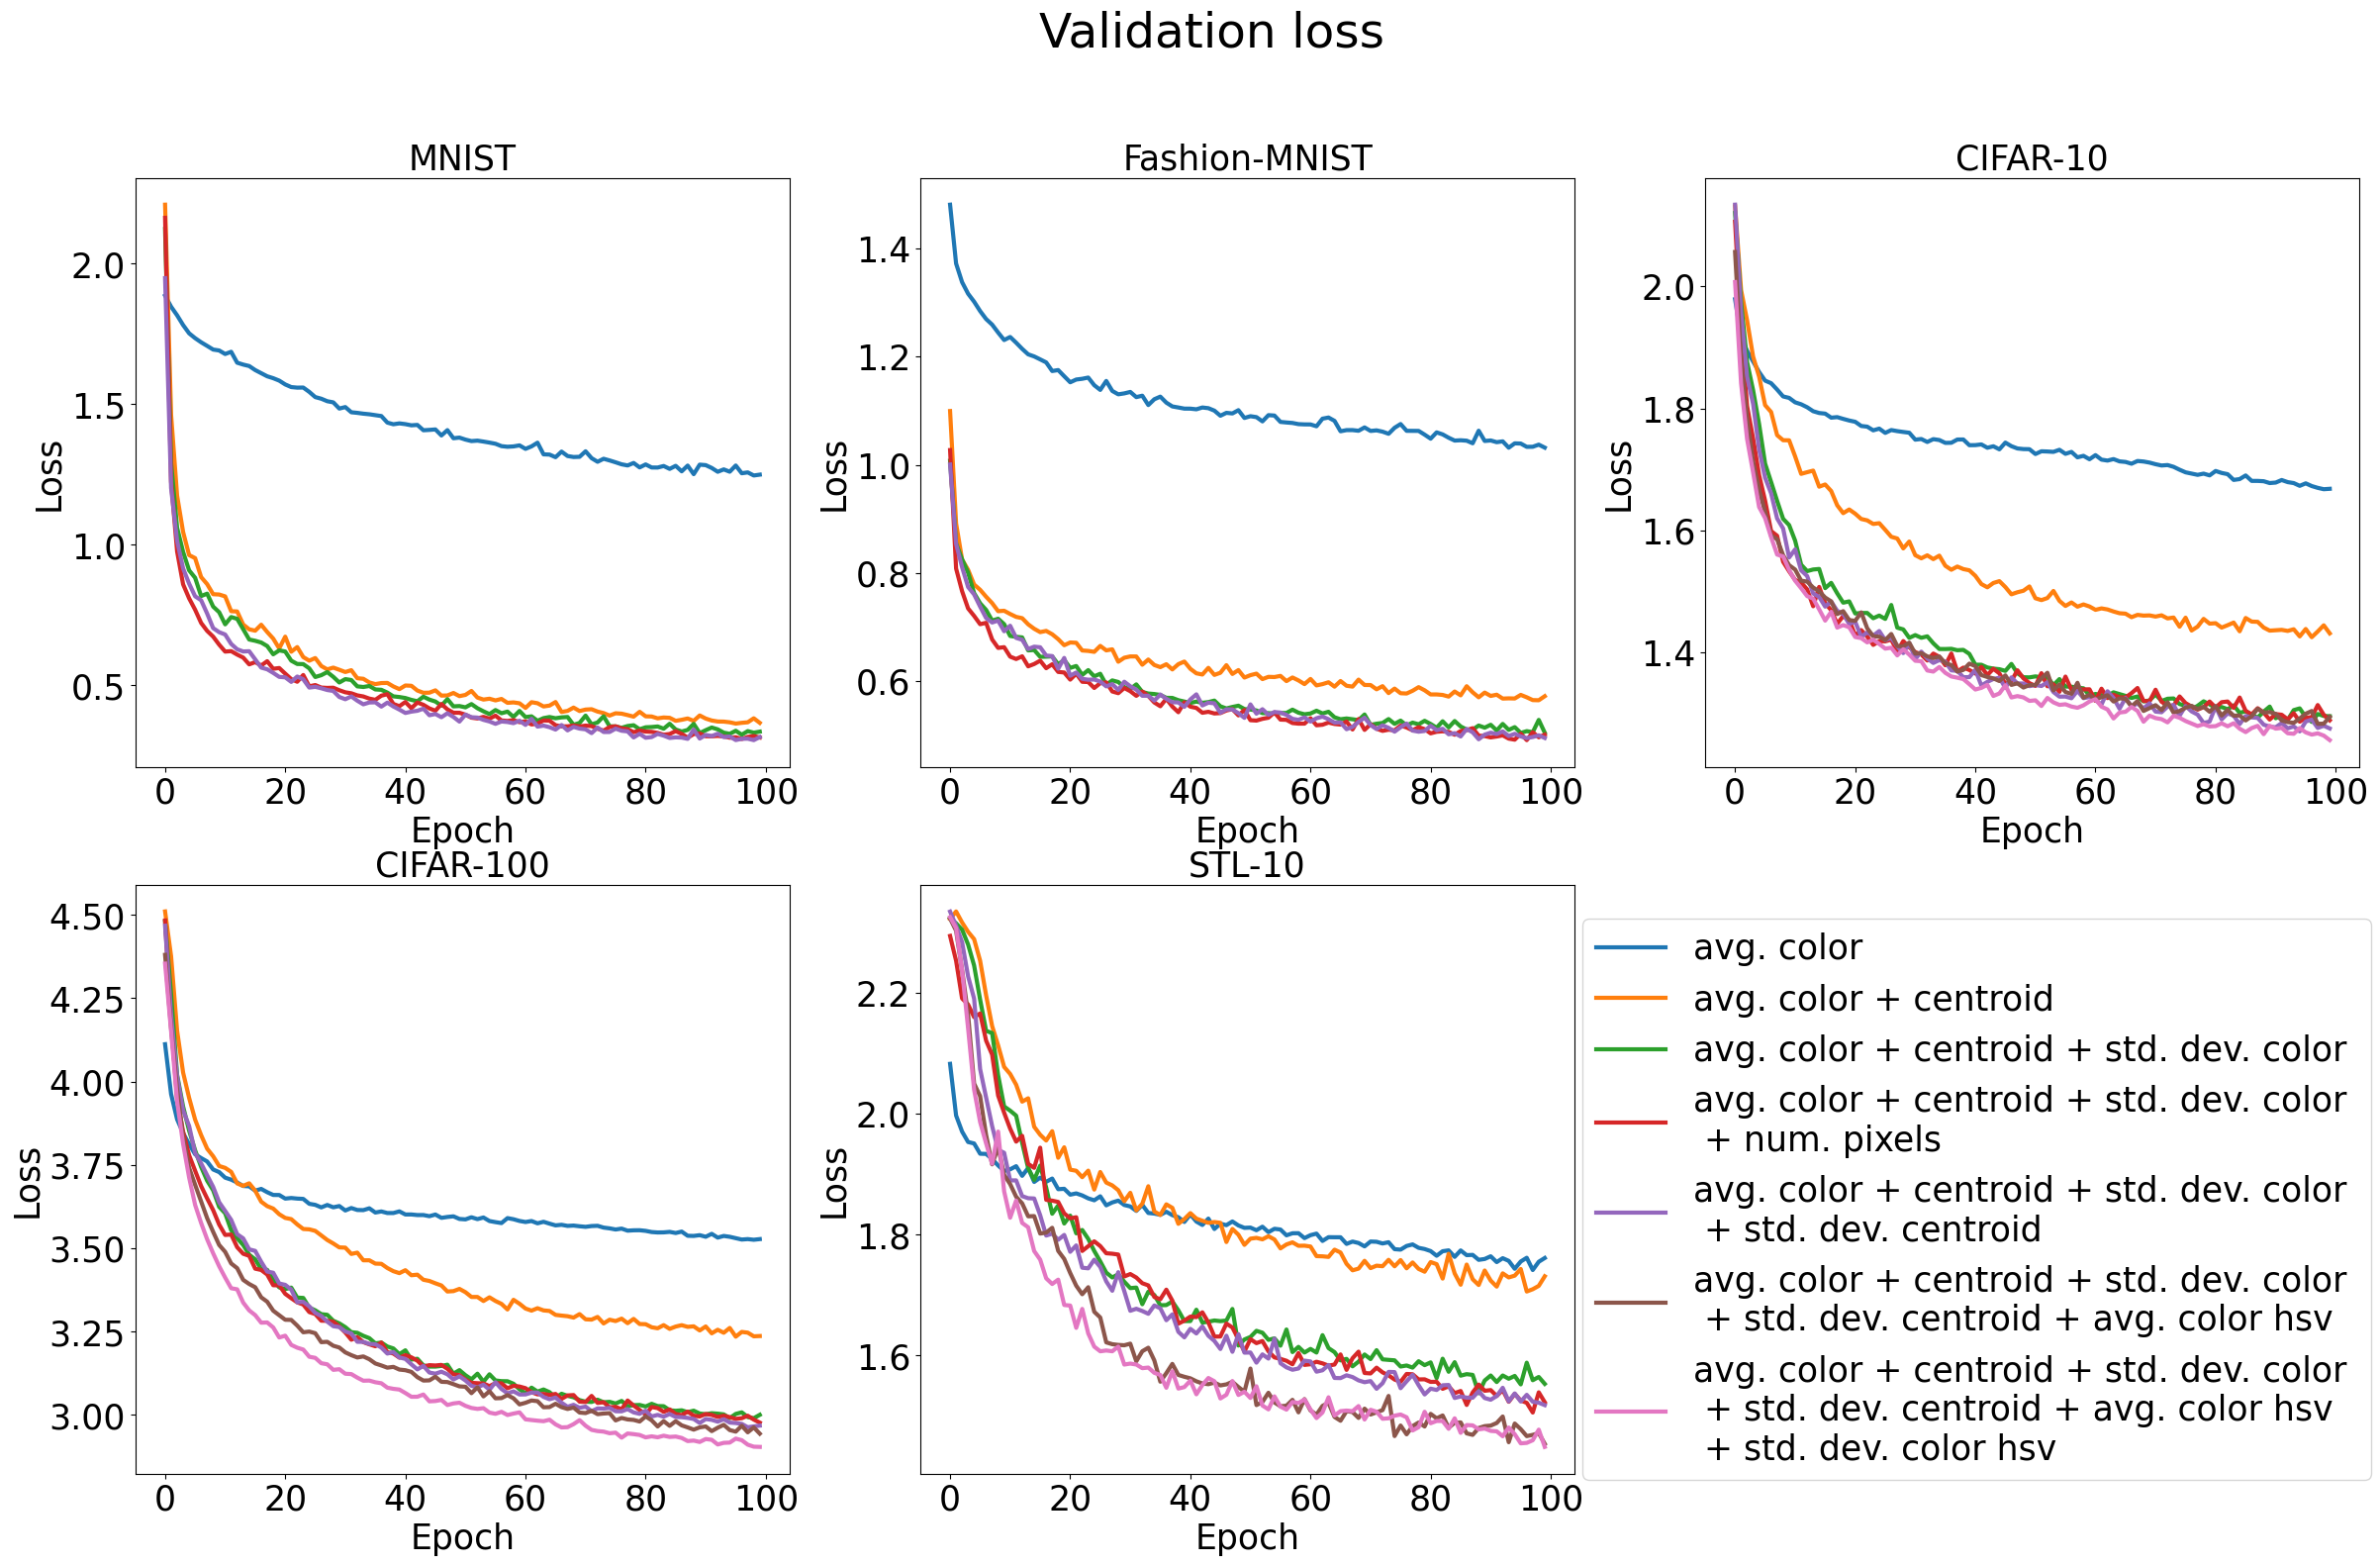

In [66]:
rows, cols = 2, 3
figsize = (29, 17)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for dsi, ds in enumerate(dss):
    axi, axj = int(np.floor(dsi/cols)),  int(dsi % cols)
    grey_dsi = len(grey_dss)
    features = features_grey if dsi < grey_dsi else features_color
    data = data_grey if dsi < grey_dsi else data_color
    dataset_index_real = dsi if dsi < grey_dsi else dsi - grey_dsi
    ax[axi][axj].tick_params(labelsize=fontsize)
    for features_idx, features_name in enumerate(features):
        ax[axi][axj].set_xlabel('Epoch', fontsize=fontsize)
        ax[axi][axj].set_ylabel('Loss', fontsize=fontsize)
        ax[axi][axj].set_title(ds_pretty_names[ds], fontsize=fontsize)
        ax[axi][axj].plot(epochs, data[dataset_index_real][features_idx][epochs_header['validation loss']], 
                          label=features_pretty[features_idx],
                          linewidth=3)
ax[rows-1][cols-1].remove()
handles, labels = ax[rows-1][cols-2].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1 - 0.09, 0.45), fontsize=fontsize)
fig.suptitle('Validation loss', fontsize=fontsize+10)
plt.savefig('imgs/features-loss-validation.png', bbox_inches='tight')
plt.show()


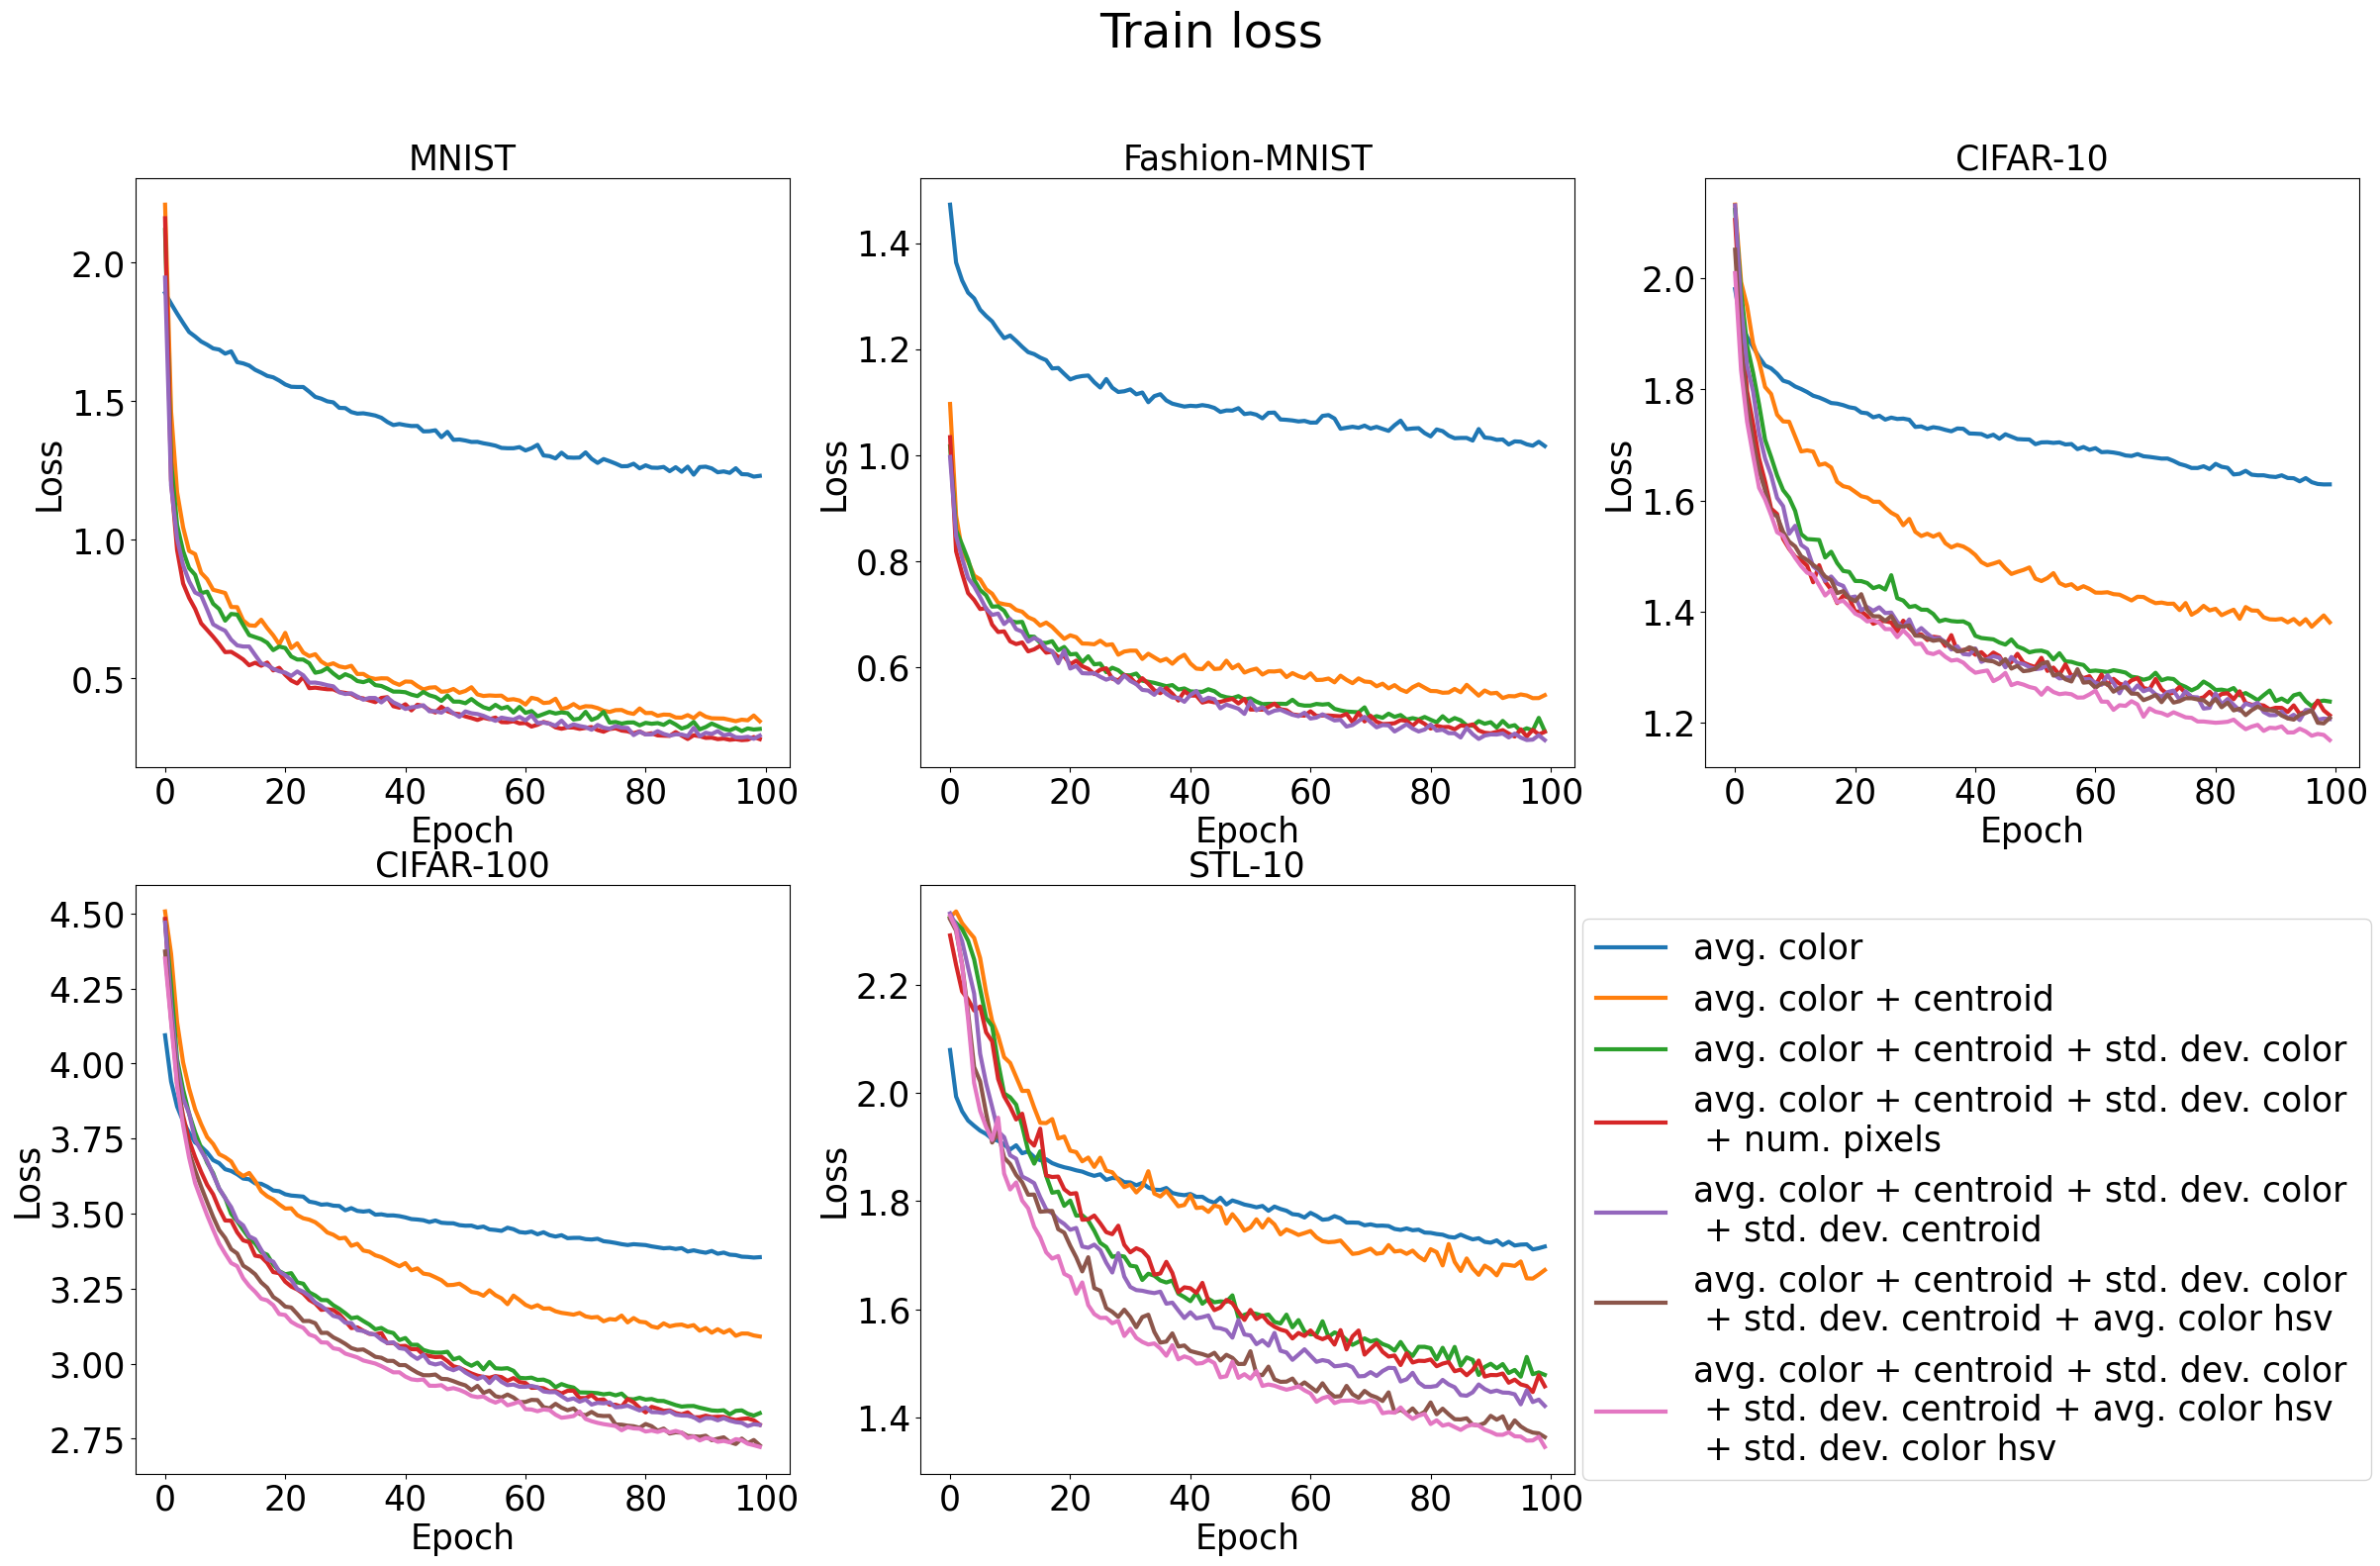

In [67]:
rows, cols = 2, 3
figsize = (29, 17)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for dsi, ds in enumerate(dss):
    axi, axj = int(np.floor(dsi/cols)),  int(dsi % cols)
    grey_dsi = len(grey_dss)
    features = features_grey if dsi < grey_dsi else features_color
    data = data_grey if dsi < grey_dsi else data_color
    dataset_index_real = dsi if dsi < grey_dsi else dsi - grey_dsi
    ax[axi][axj].tick_params(labelsize=fontsize)
    for features_idx, features_name in enumerate(features):
        ax[axi][axj].set_xlabel('Epoch', fontsize=fontsize)
        ax[axi][axj].set_ylabel('Loss', fontsize=fontsize)
        ax[axi][axj].set_title(ds_pretty_names[ds], fontsize=fontsize)
        ax[axi][axj].plot(epochs, data[dataset_index_real][features_idx][epochs_header['train loss']], 
                          label=features_pretty[features_idx],
                          linewidth=3)
ax[rows-1][cols-1].remove()
handles, labels = ax[rows-1][cols-2].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1 - 0.09, 0.45), fontsize=fontsize)
fig.suptitle('Train loss', fontsize=fontsize+10)
plt.savefig('imgs/features-loss-train.png', bbox_inches='tight')
plt.show()

### Effective results

In [149]:
relevant_metrics = list(meta_header.keys())[meta_header['accuracy']:meta_header['stdv train loss']+1]
relevant_metrics = {metric:i for i, metric in enumerate(relevant_metrics)}
relevant_metrics

{'accuracy': 0,
 'stdv accuracy': 1,
 'precision micro': 2,
 'stdv precision micro': 3,
 'precision macro': 4,
 'stdv precision macro': 5,
 'precision weighted': 6,
 'stdv precision weighted': 7,
 'recall micro': 8,
 'stdv recall micro': 9,
 'recall macro': 10,
 'stdv recall macro': 11,
 'recall weighted': 12,
 'stdv recall weighted': 13,
 'f1 micro': 14,
 'stdv f1 micro': 15,
 'f1 macro': 16,
 'stdv f1 macro': 17,
 'f1 weighted': 18,
 'stdv f1 weighted': 19,
 'validation f1 micro': 20,
 'stdv validation f1 micro': 21,
 'validation f1 macro': 22,
 'stdv validation f1 macro': 23,
 'validation f1 weighted': 24,
 'stdv validation f1 weighted': 25,
 'train f1 micro': 26,
 'stdv train f1 micro': 27,
 'train f1 macro': 28,
 'stdv train f1 macro': 29,
 'train f1 weighted': 30,
 'stdv train f1 weighted': 31,
 'loss': 32,
 'stdv loss': 33,
 'validation loss': 34,
 'stdv validation loss': 35,
 'train loss': 36,
 'stdv train loss': 37}

In [154]:
meta_data = np.ndarray((len(dss), len(features_color),len(relevant_metrics)), dtype=np.float64)
for dsi, ds in enumerate(dss):
    filename = f'GCN/{ds}-features.csv'
    with open(filename, newline='') as file:
        reader = csv.reader(file)
        for fli, line in enumerate(reader):
            mi = 0
            if fli > 0:
                for vi, v in enumerate(line):
                    if vi >= meta_header['accuracy'] and vi <= meta_header['stdv train loss']:
                        meta_data[dsi, fli-1, mi] = float(v) if v else np.nan
                        mi += 1
            

In [152]:
fontsize = ['Avg. color', 'Centroid', 'Std. dev. color', 'Num. of pixels', 'Std. dev. centroid', 'Avg. HSV', 'Std. dev. HSV']
for i, f in enumerate(fontsize):
    line = f
    for dg, _ in enumerate(data_grey):
        if i > 4:
            line+="&-&-&-"
        else:
            test_f1      = meta_data[dg][i][relevant_metrics['f1 macro']]
            test_f1_stdv = meta_data[dg][i][relevant_metrics['stdv f1 macro']]  
            validation_f1      = meta_data[dg][i][relevant_metrics['validation f1 macro']]
            validation_f1_stdv = meta_data[dg][i][relevant_metrics['stdv validation f1 macro']]  
            train_f1      = meta_data[dg][i][relevant_metrics['train f1 macro']]
            train_f1_stdv = meta_data[dg][i][relevant_metrics['stdv train f1 macro']]  
            line += f"&{test_f1*100:.1f}$\pm${test_f1_stdv:.2f}"
            line += f"&{validation_f1*100:.1f}$\pm${validation_f1_stdv:.2f}"
            line += f"&{train_f1*100:.1f}$\pm${train_f1_stdv:.2f}"
    for dc, _ in enumerate(data_color):
        test_f1      = meta_data[len(data_grey) + dc][i][relevant_metrics['f1 macro']]
        test_f1_stdv = meta_data[len(data_grey) + dc][i][relevant_metrics['stdv f1 macro']]  
        validation_f1      = meta_data[len(data_grey) + dc][i][relevant_metrics['validation f1 macro']]
        validation_f1_stdv = meta_data[len(data_grey) + dc][i][relevant_metrics['stdv validation f1 macro']]  
        train_f1      = meta_data[len(data_grey) + dc][i][relevant_metrics['train f1 macro']]
        train_f1_stdv = meta_data[len(data_grey) + dc][i][relevant_metrics['stdv train f1 macro']]  
        line += f"&{test_f1*100:.1f}$\pm${test_f1_stdv:.2f}"
        line += f"&{validation_f1*100:.1f}$\pm${validation_f1_stdv:.2f}"
        line += f"&{train_f1*100:.1f}$\pm${train_f1_stdv:.2f}"
    line += '\\\\'
    print(line)

Avg. color&57.1$\pm$0.04&56.4$\pm$0.04&56.6$\pm$0.04&61.7$\pm$0.01&61.0$\pm$0.01&61.9$\pm$0.00&41.4$\pm$0.01&40.7$\pm$0.01&42.0$\pm$0.01&17.2$\pm$0.01&15.2$\pm$0.01&17.7$\pm$0.01&35.8$\pm$0.01&35.9$\pm$0.01&36.9$\pm$0.00\\
Centroid&58.6$\pm$0.01&57.9$\pm$0.01&58.3$\pm$0.01&79.0$\pm$0.01&78.7$\pm$0.01&79.3$\pm$0.00&50.7$\pm$0.01&49.5$\pm$0.01&51.2$\pm$0.01&22.3$\pm$0.01&20.8$\pm$0.01&22.8$\pm$0.01&38.2$\pm$0.01&36.6$\pm$0.02&38.5$\pm$0.01\\
Std. dev. color&89.4$\pm$0.00&88.9$\pm$0.00&89.2$\pm$0.00&81.7$\pm$0.01&81.3$\pm$0.00&82.0$\pm$0.00&55.5$\pm$0.01&54.1$\pm$0.01&56.1$\pm$0.01&27.6$\pm$0.01&25.5$\pm$0.01&28.5$\pm$0.01&44.2$\pm$0.00&42.1$\pm$0.01&45.0$\pm$0.01\\
Num. of pixels&90.3$\pm$0.01&89.7$\pm$0.00&90.3$\pm$0.01&82.4$\pm$0.01&81.9$\pm$0.00&82.7$\pm$0.00&56.1$\pm$0.00&54.0$\pm$0.01&56.6$\pm$0.01&28.1$\pm$0.02&26.1$\pm$0.01&28.9$\pm$0.01&45.6$\pm$0.01&43.8$\pm$0.01&46.0$\pm$0.01\\
Std. dev. centroid&91.4$\pm$0.01&90.7$\pm$0.01&91.4$\pm$0.00&82.0$\pm$0.02&81.2$\pm$0.01&82.3$\pm$0.0

In [158]:
print(f'{{{1}}}')

{1}


In [167]:
fs_grey  = ['Avg. color', 'Centroid', 'Std. dev. color', 'Num. of pixels', 'Std. dev. centroid']
fs_color = ['Avg. color', 'Centroid', 'Std. dev. color', 'Num. of pixels', 'Std. dev. centroid', 'Avg. HSV', 'Std. dev. HSV']
for dsi, ds in enumerate(dss):
    fontsize = fs_grey if dsi < len(grey_dss) else fs_color
    for fi, f in enumerate(fontsize):
        if fi == 0:
            line = f'\multirow{{{len(fontsize)}}}{{*}}{{{ds_pretty_names[ds]}}}&{f}'
        else:
            line = f'&{f}'
        
        # f1 macro 
        test_f1      = meta_data[dsi][fi][relevant_metrics['f1 macro']]
        test_f1_stdv = meta_data[dsi][fi][relevant_metrics['stdv f1 macro']]  
        validation_f1      = meta_data[dsi][fi][relevant_metrics['validation f1 macro']]
        validation_f1_stdv = meta_data[dsi][fi][relevant_metrics['stdv validation f1 macro']]  
        train_f1      = meta_data[dsi][fi][relevant_metrics['train f1 macro']]
        train_f1_stdv = meta_data[dsi][fi][relevant_metrics['stdv train f1 macro']]  
        line += f"&{test_f1*100:.1f}$\pm${test_f1_stdv*100:.1f}"
        line += f"&{validation_f1*100:.1f}$\pm${validation_f1_stdv*100:.1f}"
        line += f"&{train_f1*100:.1f}$\pm${train_f1_stdv*100:.1f}"

        # loss 
        test_loss      = meta_data[dsi][fi][relevant_metrics['loss']]
        test_loss_stdv = meta_data[dsi][fi][relevant_metrics['stdv loss']]  
        validation_loss      = meta_data[dsi][fi][relevant_metrics['validation loss']]
        validation_loss_stdv = meta_data[dsi][fi][relevant_metrics['stdv validation loss']]  
        train_loss      = meta_data[dsi][fi][relevant_metrics['train loss']]
        train_loss_stdv = meta_data[dsi][fi][relevant_metrics['stdv train loss']]  
        line += f"&{test_loss:.3f}$\pm${test_loss_stdv:.3f}"
        line += f"&{validation_loss:.3f}$\pm${validation_loss_stdv:.3f}"
        line += f"&{train_loss:.3f}$\pm${train_loss_stdv:.3f}"

        print(line + '\\\\')
    print('\\hline')


\multirow{5}{*}{MNIST}&Avg. color&57.1$\pm$4.3&56.4$\pm$4.0&56.6$\pm$4.1&1.255$\pm$0.103&1.270$\pm$0.099&1.262$\pm$0.094\\
&Centroid&58.6$\pm$0.9&57.9$\pm$0.9&58.3$\pm$0.9&1.210$\pm$0.024&1.233$\pm$0.014&1.216$\pm$0.019\\
&Std. dev. color&89.4$\pm$0.2&88.9$\pm$0.5&89.2$\pm$0.2&0.332$\pm$0.006&0.355$\pm$0.015&0.334$\pm$0.006\\
&Num. of pixels&90.3$\pm$0.8&89.7$\pm$0.5&90.3$\pm$0.6&0.300$\pm$0.023&0.316$\pm$0.011&0.301$\pm$0.017\\
&Std. dev. centroid&91.4$\pm$0.7&90.7$\pm$0.7&91.4$\pm$0.4&0.269$\pm$0.018&0.299$\pm$0.024&0.267$\pm$0.014\\
\hline
\multirow{5}{*}{Fashion-MNIST}&Avg. color&61.7$\pm$0.7&61.0$\pm$0.6&61.9$\pm$0.2&1.013$\pm$0.012&1.020$\pm$0.005&1.007$\pm$0.006\\
&Centroid&79.0$\pm$0.6&78.7$\pm$0.7&79.3$\pm$0.5&0.547$\pm$0.016&0.556$\pm$0.013&0.538$\pm$0.006\\
&Std. dev. color&81.7$\pm$0.6&81.3$\pm$0.5&82.0$\pm$0.1&0.485$\pm$0.016&0.497$\pm$0.009&0.474$\pm$0.001\\
&Num. of pixels&82.4$\pm$0.7&81.9$\pm$0.4&82.7$\pm$0.3&0.469$\pm$0.016&0.481$\pm$0.009&0.460$\pm$0.004\\
&Std. dev.

In [183]:
stops = []
bests = []
for ds in dss:
    filename = f'GCN/{ds}-features.csv'
    ds_stops = []
    ds_bests = []
    with open(filename, newline='') as file:
        reader = csv.reader(file)
        for fli, line in enumerate(reader):
            if fli > 0:
                for vi, v in enumerate(line):
                    if vi == meta_header['last epochs']:
                        ds_stops.append([int(s) for s in v.split(',')])
                    if vi == meta_header['best epochs']:
                        ds_bests.append([int(s) for s in v.split(',')])
    stops.append(ds_stops)
    bests.append(ds_bests)                       
                        

In [181]:
fs_grey  = ['Avg. color', 'Centroid', 'Std. dev. color', 'Num. of pixels', 'Std. dev. centroid']
fs_color = ['Avg. color', 'Centroid', 'Std. dev. color', 'Num. of pixels', 'Std. dev. centroid', 'Avg. HSV', 'Std. dev. HSV']
for dsi, ds in enumerate(dss):
    print(ds)
    fontsize = fs_grey if dsi < len(grey_dss) else fs_color
    for fi, f in enumerate(fontsize):
        print(f'{f}:')
        print(f'    bests epochs = {bests[dsi][fi]}')
        print(f'    stops        = {stops[dsi][fi]}')
    print('----------------')

mnist
Avg. color:
    bests epochs = 93, 90, 29, 97, 50
    stops        = 99, 96, 33, 99, 56
Centroid:
    bests epochs = 93, 88, 98, 98, 96
    stops        = 99, 99, 99, 99, 99
Std. dev. color:
    bests epochs = 95, 97, 99, 96, 98
    stops        = 99, 99, 99, 99, 99
Num. of pixels:
    bests epochs = 94, 94, 96, 86, 93
    stops        = 99, 99, 99, 99, 99
Std. dev. centroid:
    bests epochs = 89, 96, 97, 89, 94
    stops        = 99, 99, 99, 99, 99
----------------
fashion_mnist
Avg. color:
    bests epochs = 99, 94, 96, 97, 93
    stops        = 99, 99, 99, 99, 99
Centroid:
    bests epochs = 92, 98, 94, 98, 97
    stops        = 99, 99, 99, 99, 99
Std. dev. color:
    bests epochs = 99, 97, 95, 97, 91
    stops        = 99, 99, 99, 99, 99
Num. of pixels:
    bests epochs = 98, 90, 92, 98, 94
    stops        = 99, 99, 99, 99, 99
Std. dev. centroid:
    bests epochs = 96, 99, 91, 96, 45
    stops        = 99, 99, 99, 99, 56
----------------
cifar10
Avg. color:
    bests epochs

# GAT

## Number of layers

In [6]:
num_layers = [1,2,3,4,5]
num_epochs = 100

### Per epoch 

In [8]:
data = np.ndarray((len(dss), len(num_layers), len(epochs_header), num_epochs),dtype=np.float64)

for dsi, ds in enumerate(dss):
    basedir = f'GAT/{ds}/'
    for li, l in enumerate(num_layers):
        filename = f'l{l}h2n75-RAG-SLIC0-avg_color-centroid-std_deviation_centroid-std_deviation_color.csv'
        with open(basedir + filename, newline='') as file:
            reader = csv.reader(file)
            for ei, e in enumerate(reader):
                if ei > 0:
                    for vi, v in enumerate(e):
                        data[dsi, li, vi, ei-1] = float(v) if v else np.nan

In [32]:
def plot_all_dss(metric, metric_pretty):
    epochs = range(num_epochs)
    rows, cols = 2, 3
    figsize = (29, 17)
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    for dsi, ds in enumerate(dss):
        axi, axj = int(np.floor(dsi/cols)),  int(dsi % cols)
        ax[axi][axj].tick_params(labelsize=fontsize)
        for li, l in enumerate(num_layers):
            ax[axi][axj].set_xlabel('Epoch', fontsize=fontsize)
            ax[axi][axj].set_ylabel(metric_pretty, fontsize=fontsize)
            ax[axi][axj].set_title(ds_pretty_names[ds], fontsize=fontsize)
            ax[axi][axj].plot(epochs, data[dsi, li, epochs_header[metric]], 
                              label=f'{l} layer{"s" if l>1 else ""}',
                              linewidth=3)
    ax[rows-1][cols-1].remove()
    handles, labels = ax[rows-1][cols-2].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1 - 0.225, 0.45), fontsize=fontsize)
    fig.suptitle(metric_pretty, fontsize=fontsize+10)
    plt.savefig(f'imgs/gat-layers-{"-".join(metric.split())}.png', bbox_inches='tight')
    plt.show()

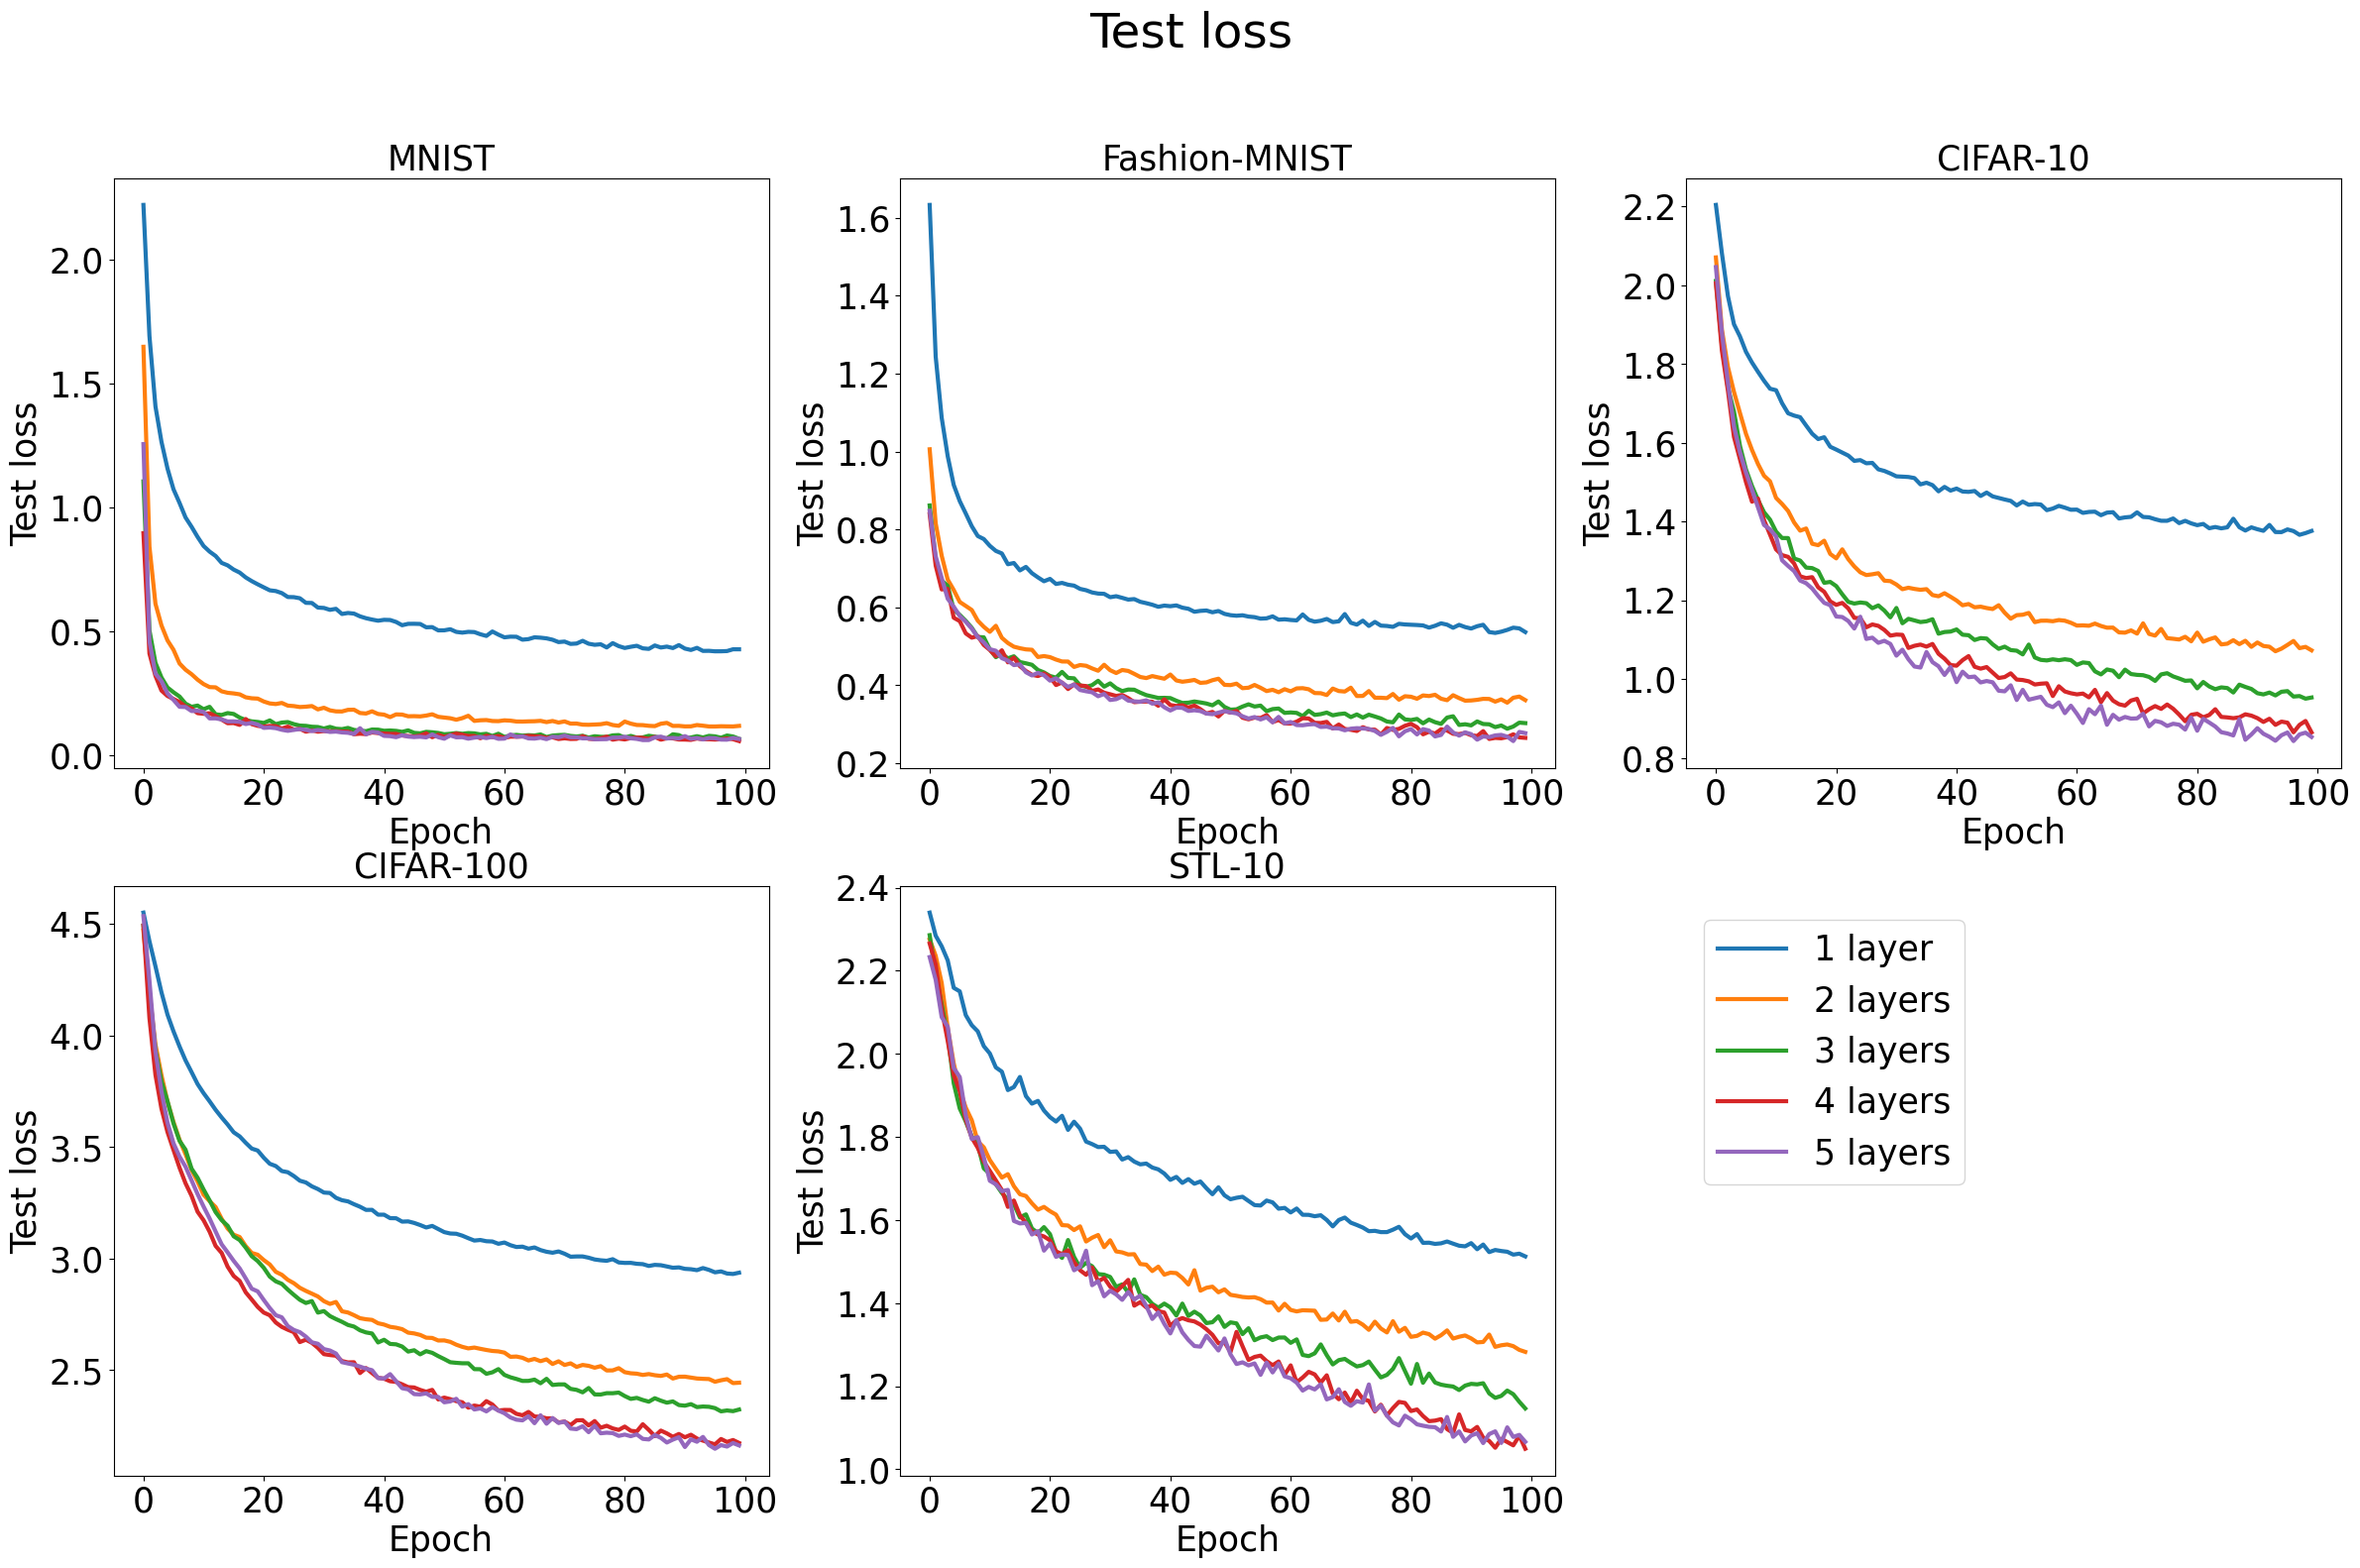

In [33]:
plot_all_dss('loss', 'Test loss')

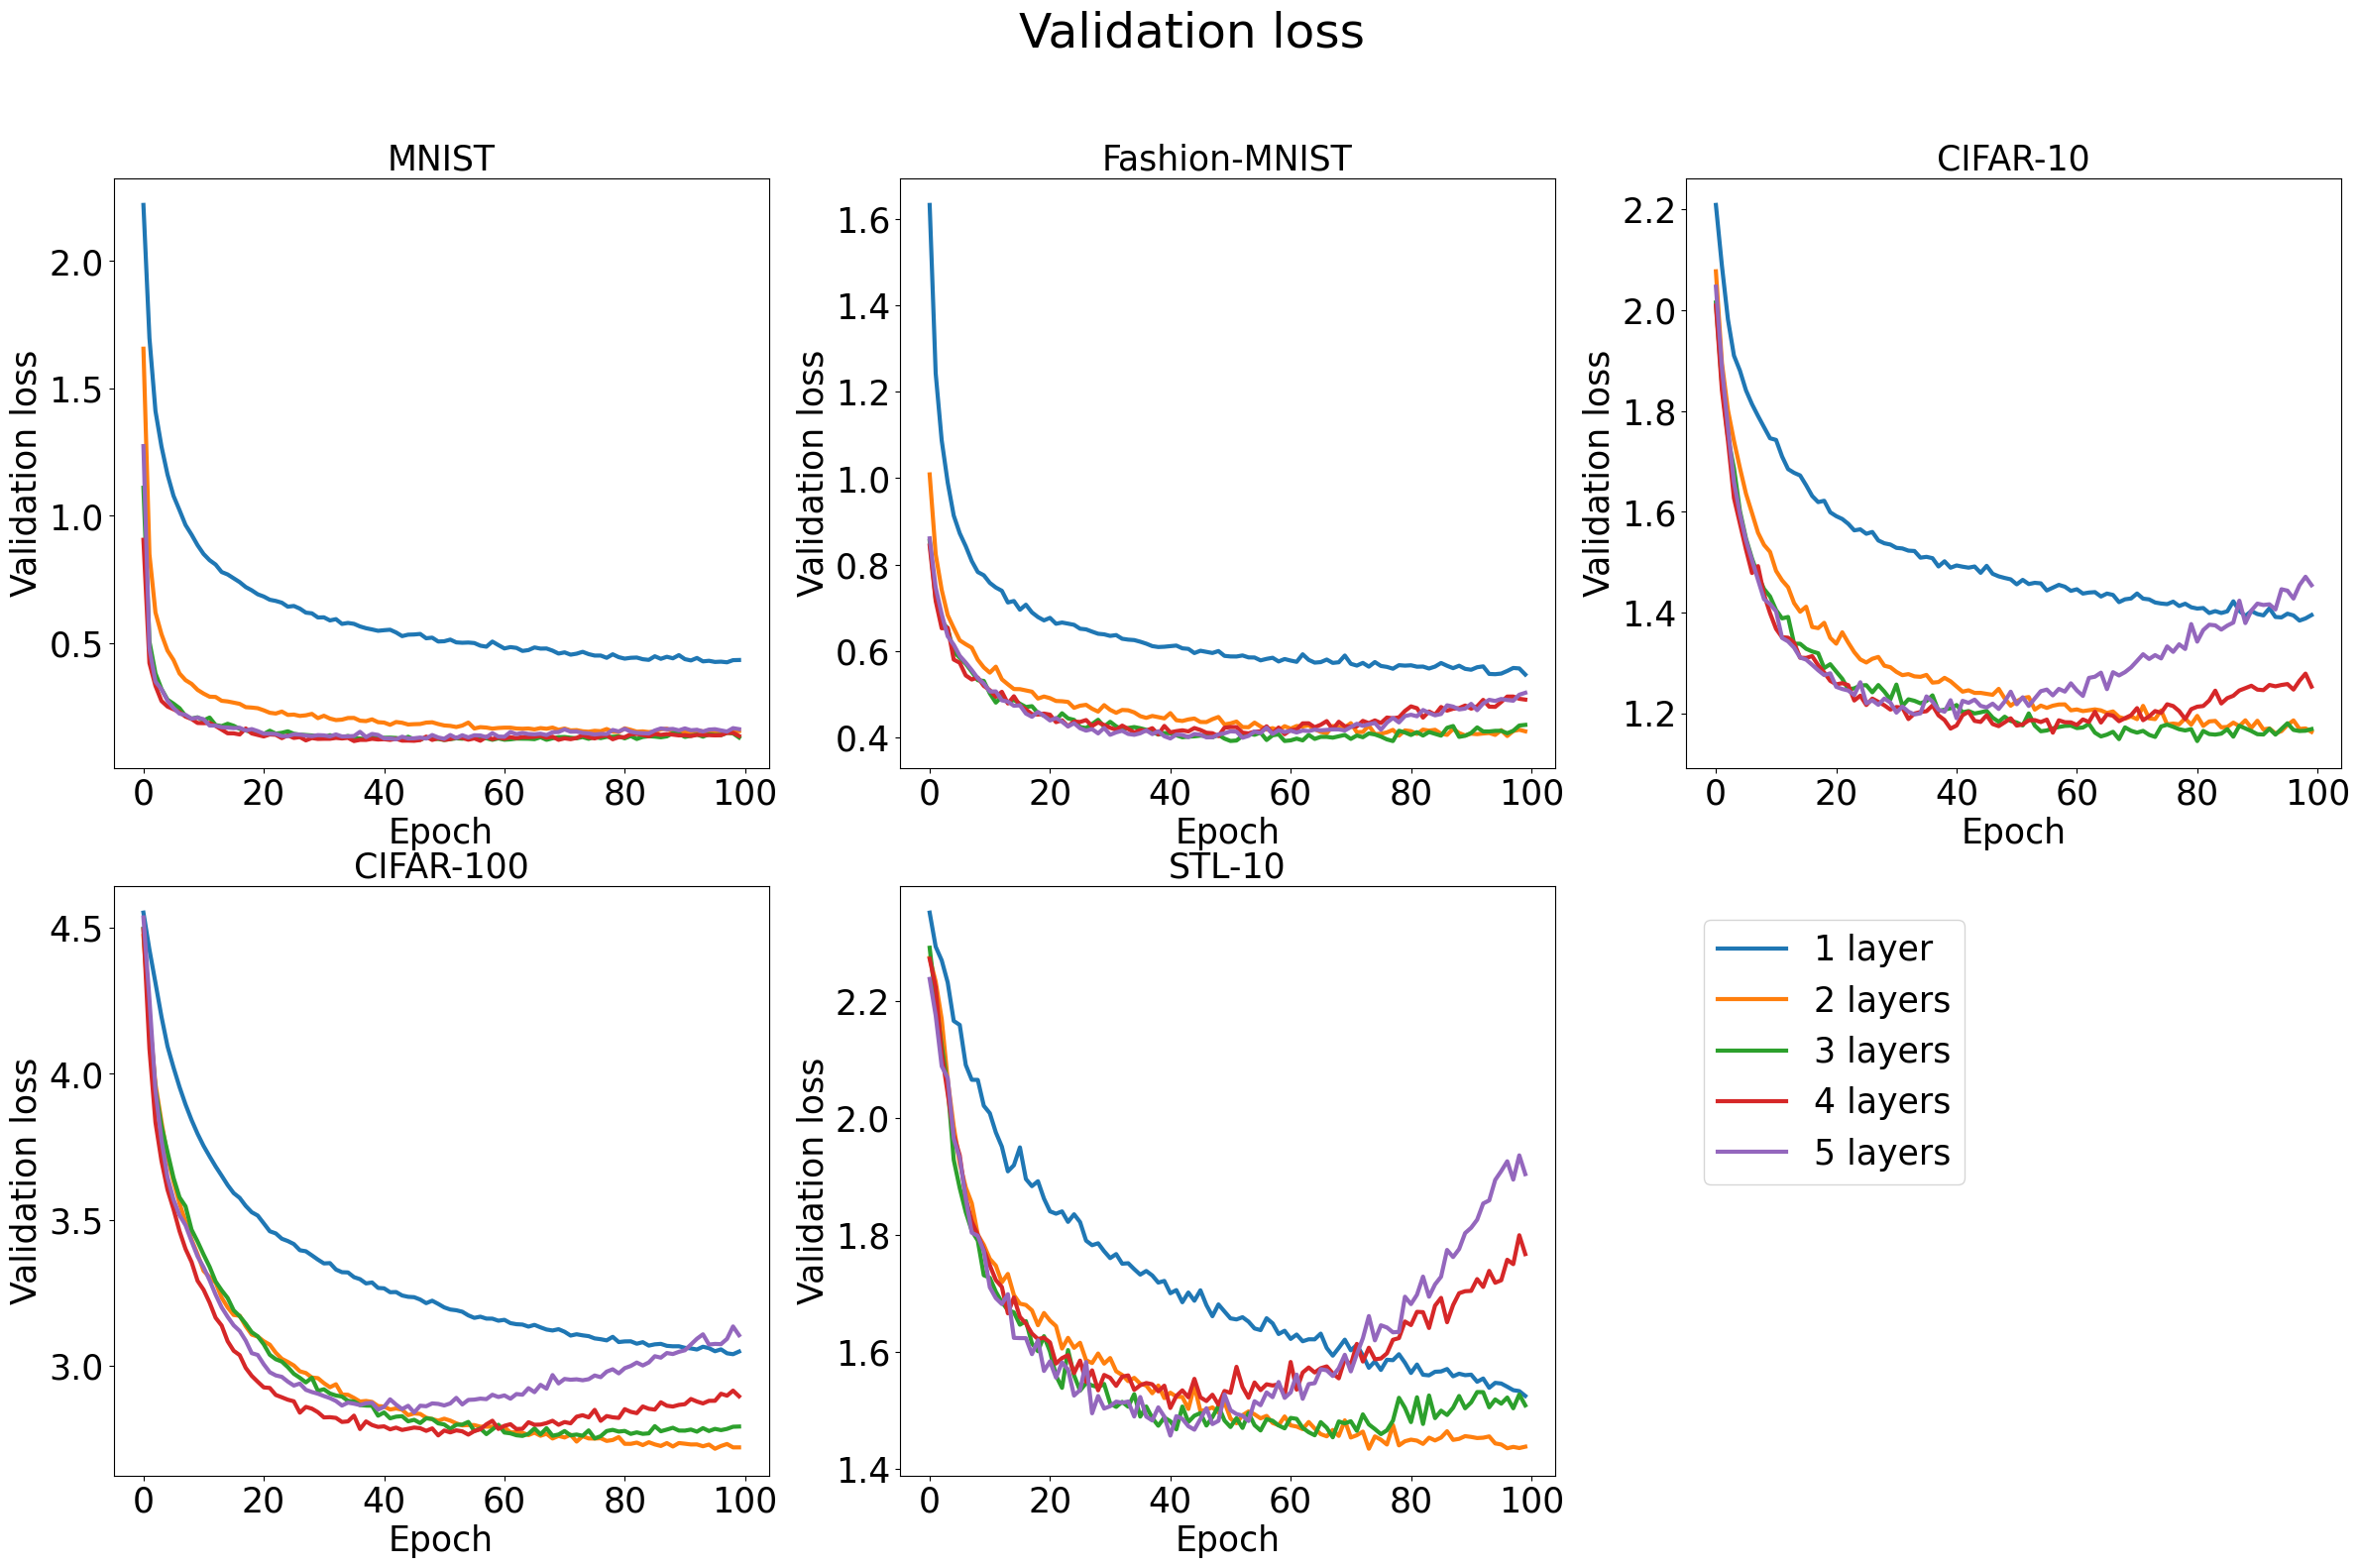

In [91]:
plot_all_dss('validation loss', 'Validation loss')

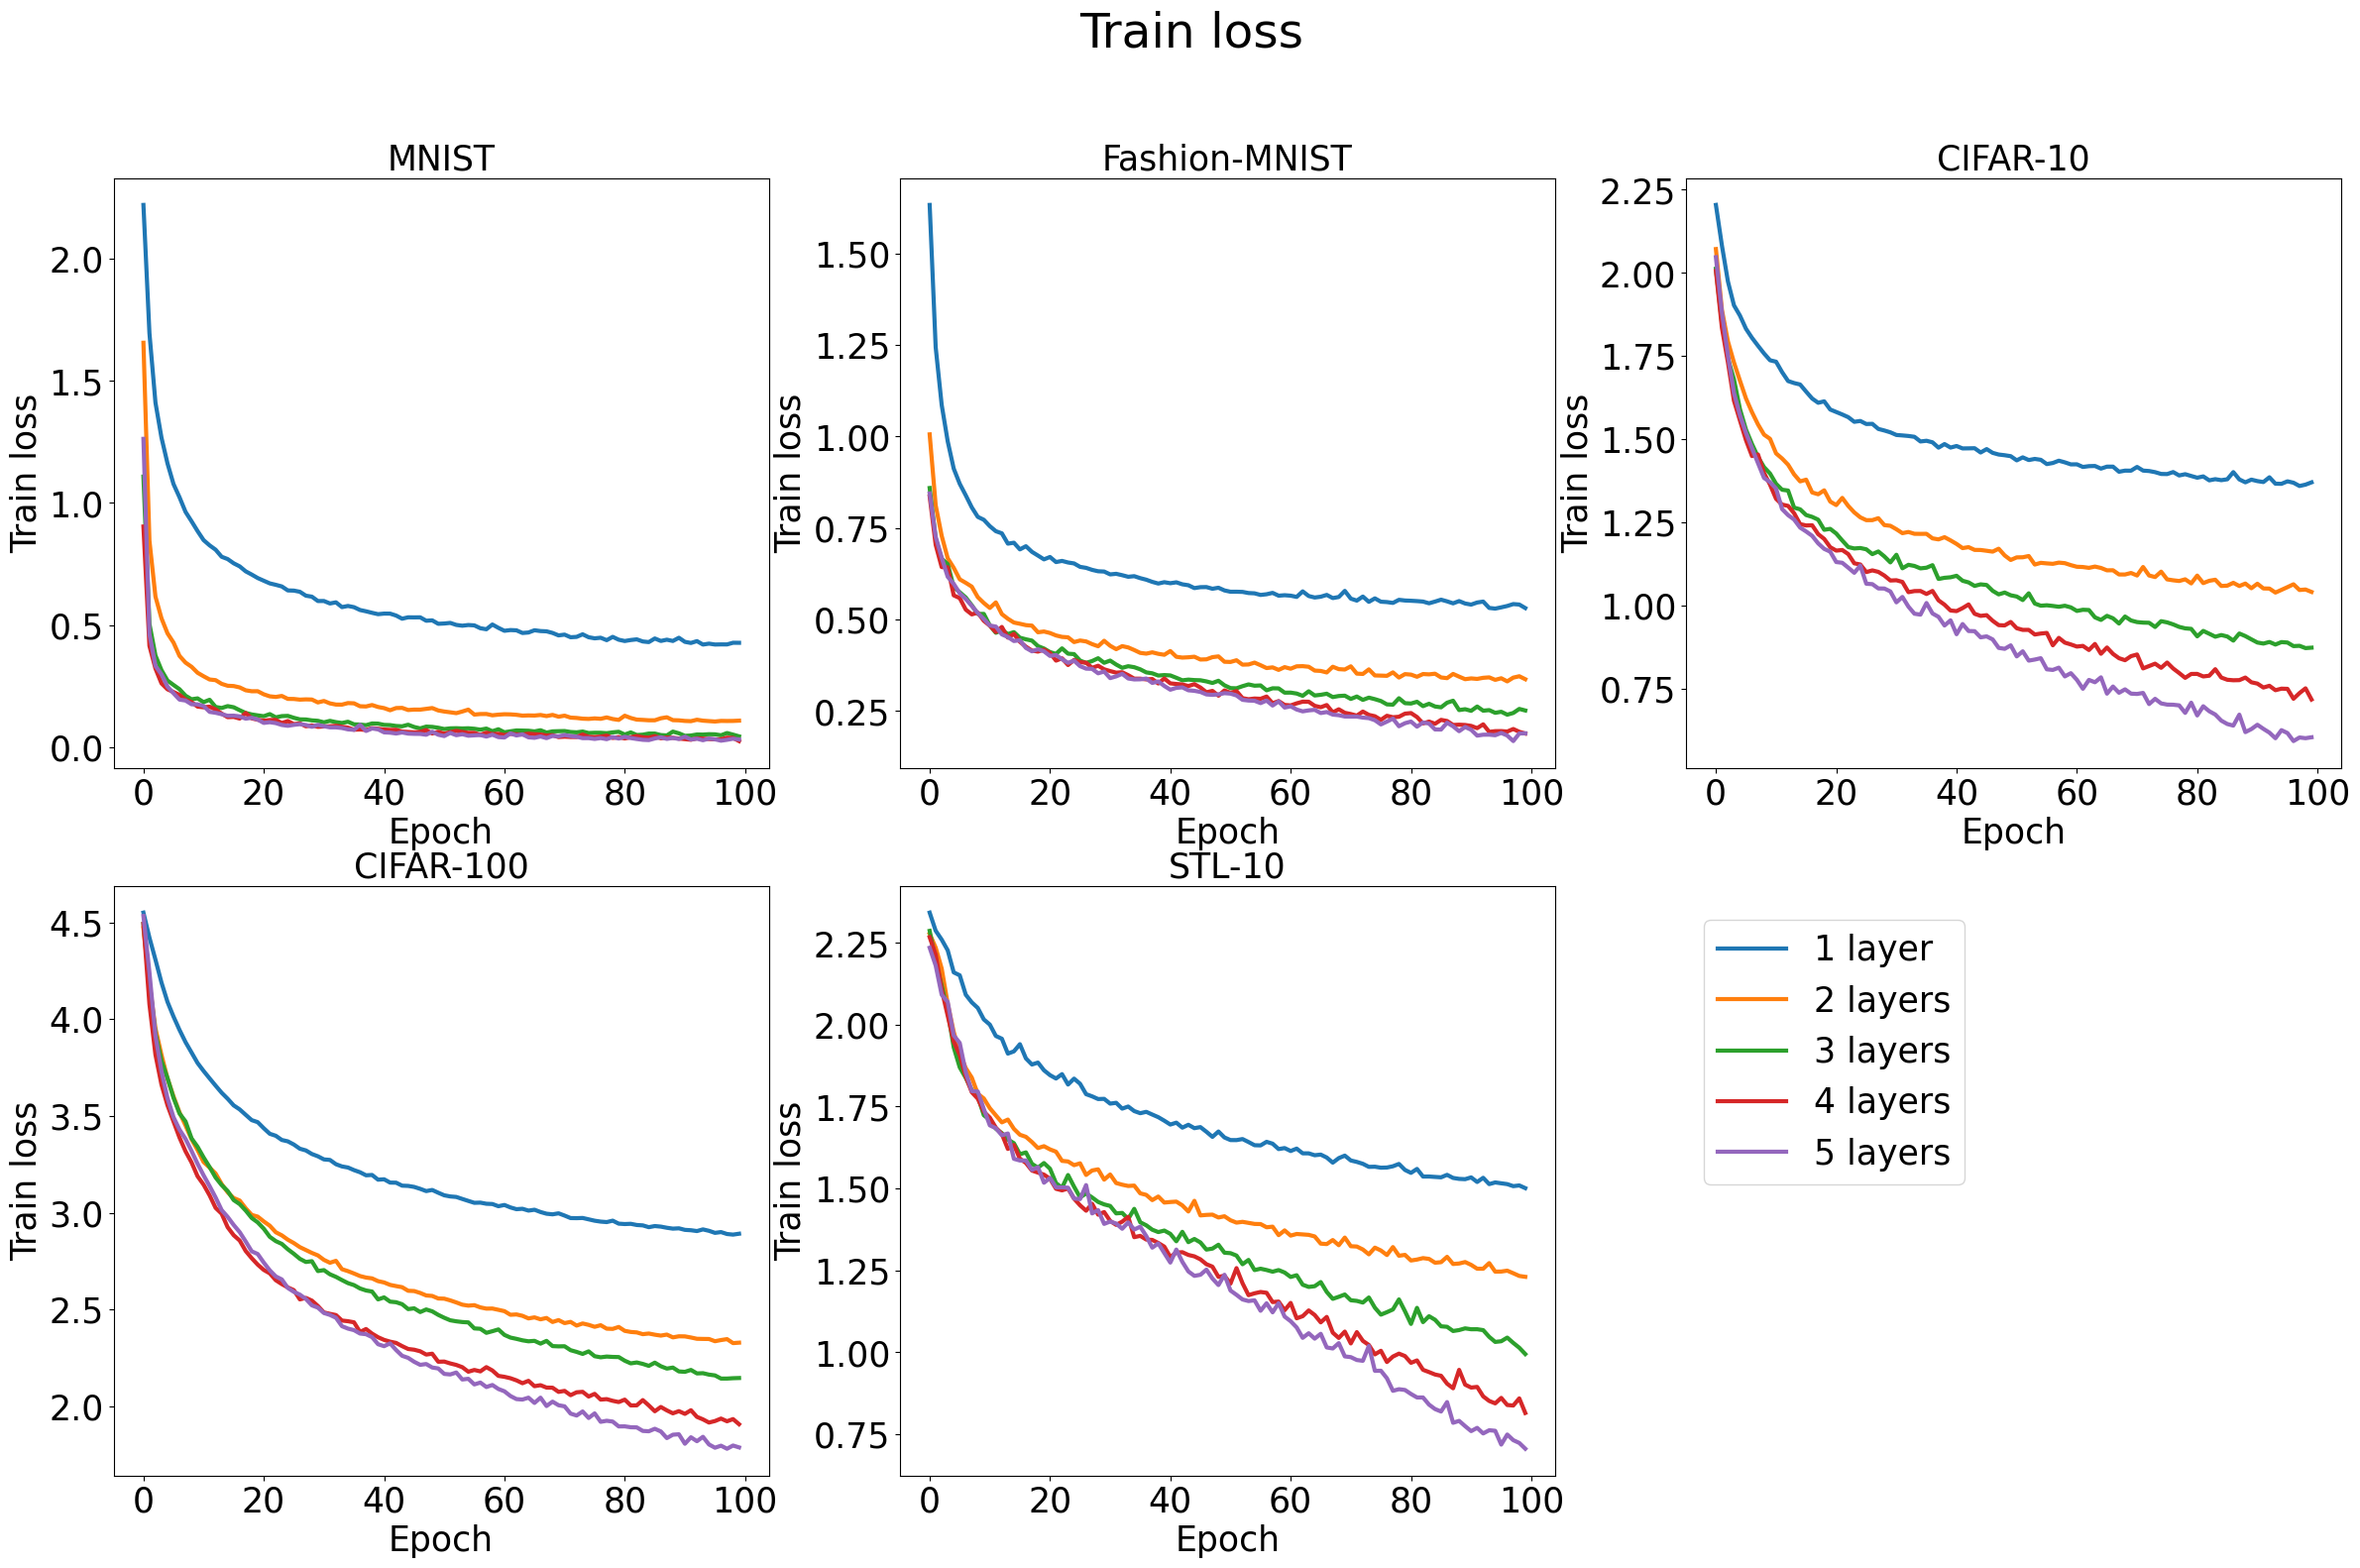

In [92]:
plot_all_dss('train loss', 'Train loss')

### End results

In [51]:
mi_0, mi_f = meta_header['accuracy'], meta_header['training time']
relevant_metrics = list(meta_header.keys())[mi_0:mi_f+1]
relevant_metrics = {metric:i for i, metric in enumerate(relevant_metrics)}
relevant_metrics

{'accuracy': 0,
 'stdv accuracy': 1,
 'precision micro': 2,
 'stdv precision micro': 3,
 'precision macro': 4,
 'stdv precision macro': 5,
 'precision weighted': 6,
 'stdv precision weighted': 7,
 'recall micro': 8,
 'stdv recall micro': 9,
 'recall macro': 10,
 'stdv recall macro': 11,
 'recall weighted': 12,
 'stdv recall weighted': 13,
 'f1 micro': 14,
 'stdv f1 micro': 15,
 'f1 macro': 16,
 'stdv f1 macro': 17,
 'f1 weighted': 18,
 'stdv f1 weighted': 19,
 'validation f1 micro': 20,
 'stdv validation f1 micro': 21,
 'validation f1 macro': 22,
 'stdv validation f1 macro': 23,
 'validation f1 weighted': 24,
 'stdv validation f1 weighted': 25,
 'train f1 micro': 26,
 'stdv train f1 micro': 27,
 'train f1 macro': 28,
 'stdv train f1 macro': 29,
 'train f1 weighted': 30,
 'stdv train f1 weighted': 31,
 'loss': 32,
 'stdv loss': 33,
 'validation loss': 34,
 'stdv validation loss': 35,
 'train loss': 36,
 'stdv train loss': 37,
 'training time': 38}

In [52]:
meta_data = np.ndarray((len(dss), len(num_layers),len(relevant_metrics)), dtype=np.float64)
for dsi, ds in enumerate(dss):
    filename = f'GAT/{ds}-layers.csv'
    with open(filename, newline='') as file:
        reader = csv.reader(file)
        for fli, line in enumerate(reader):
            mi = 0
            if fli > 0:
                for vi, v in enumerate(line):
                    if vi >= mi_0 and vi <= mi_f:
                        meta_data[dsi, fli-1, mi] = float(v) if v else np.nan
                        mi += 1

In [42]:
def plot_result(metric, metric_pretty):
    figsize = (16, 7)
    fig, ax = plt.subplots(figsize=figsize)
    plt.yticks(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    for dsi, ds in enumerate(dss):
        ax.plot(num_layers, meta_data[dsi, :, relevant_metrics[metric]],'o-', 
                label=f'{ds_pretty_names[ds]}',
                linewidth=3)
    ax.set_xlabel('Number of conv. layers', fontsize=fontsize)
    ax.set_ylabel(metric_pretty, fontsize=fontsize)
    ax.set_xticks(num_layers)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, fontsize=fontsize, ncols=3, bbox_to_anchor=(0.8, 0), bbox_transform=fig.transFigure)
    plt.savefig(f'gat-layers-final-{"-".join(metric.split())}.png', bbox_inches='tight')
    plt.show()

In [88]:
def plot_result_test_val_train(metric, metric_pretty):
    figsize = (26, 12)
    fig, ax = plt.subplots(figsize=figsize)
    plt.yticks(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    for dsi, ds in enumerate(dss):
        line, = ax.plot(num_layers, meta_data[dsi, :, relevant_metrics[metric]],
                        linestyle='-', linewidth=3,
                        marker='o', markersize=10,
                        label=f'{ds_pretty_names[ds]} Test')
        ax.plot(num_layers, meta_data[dsi, :, relevant_metrics[f'validation {metric}']],
                color=line.get_color(), 
                linestyle='--', linewidth=3,
                marker='o', markersize=10,
                label=f'{ds_pretty_names[ds]} Val.')
        ax.plot(num_layers, meta_data[dsi, :, relevant_metrics[f'train {metric}']],
                color=line.get_color(), 
                linestyle=':', linewidth=3,
                marker='o', markersize=10,
                label=f'{ds_pretty_names[ds]} Train.')
    ax.set_xlabel('Number of conv. layers', fontsize=fontsize)
    ax.set_ylabel(metric_pretty, fontsize=fontsize)
    ax.set_xticks(num_layers)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, fontsize=fontsize, ncols=5, bbox_to_anchor=(0.91, 0), bbox_transform=fig.transFigure)
    plt.savefig(f'gat-layers-final-tvt-{"-".join(metric.split())}.png', bbox_inches='tight')
    plt.show()

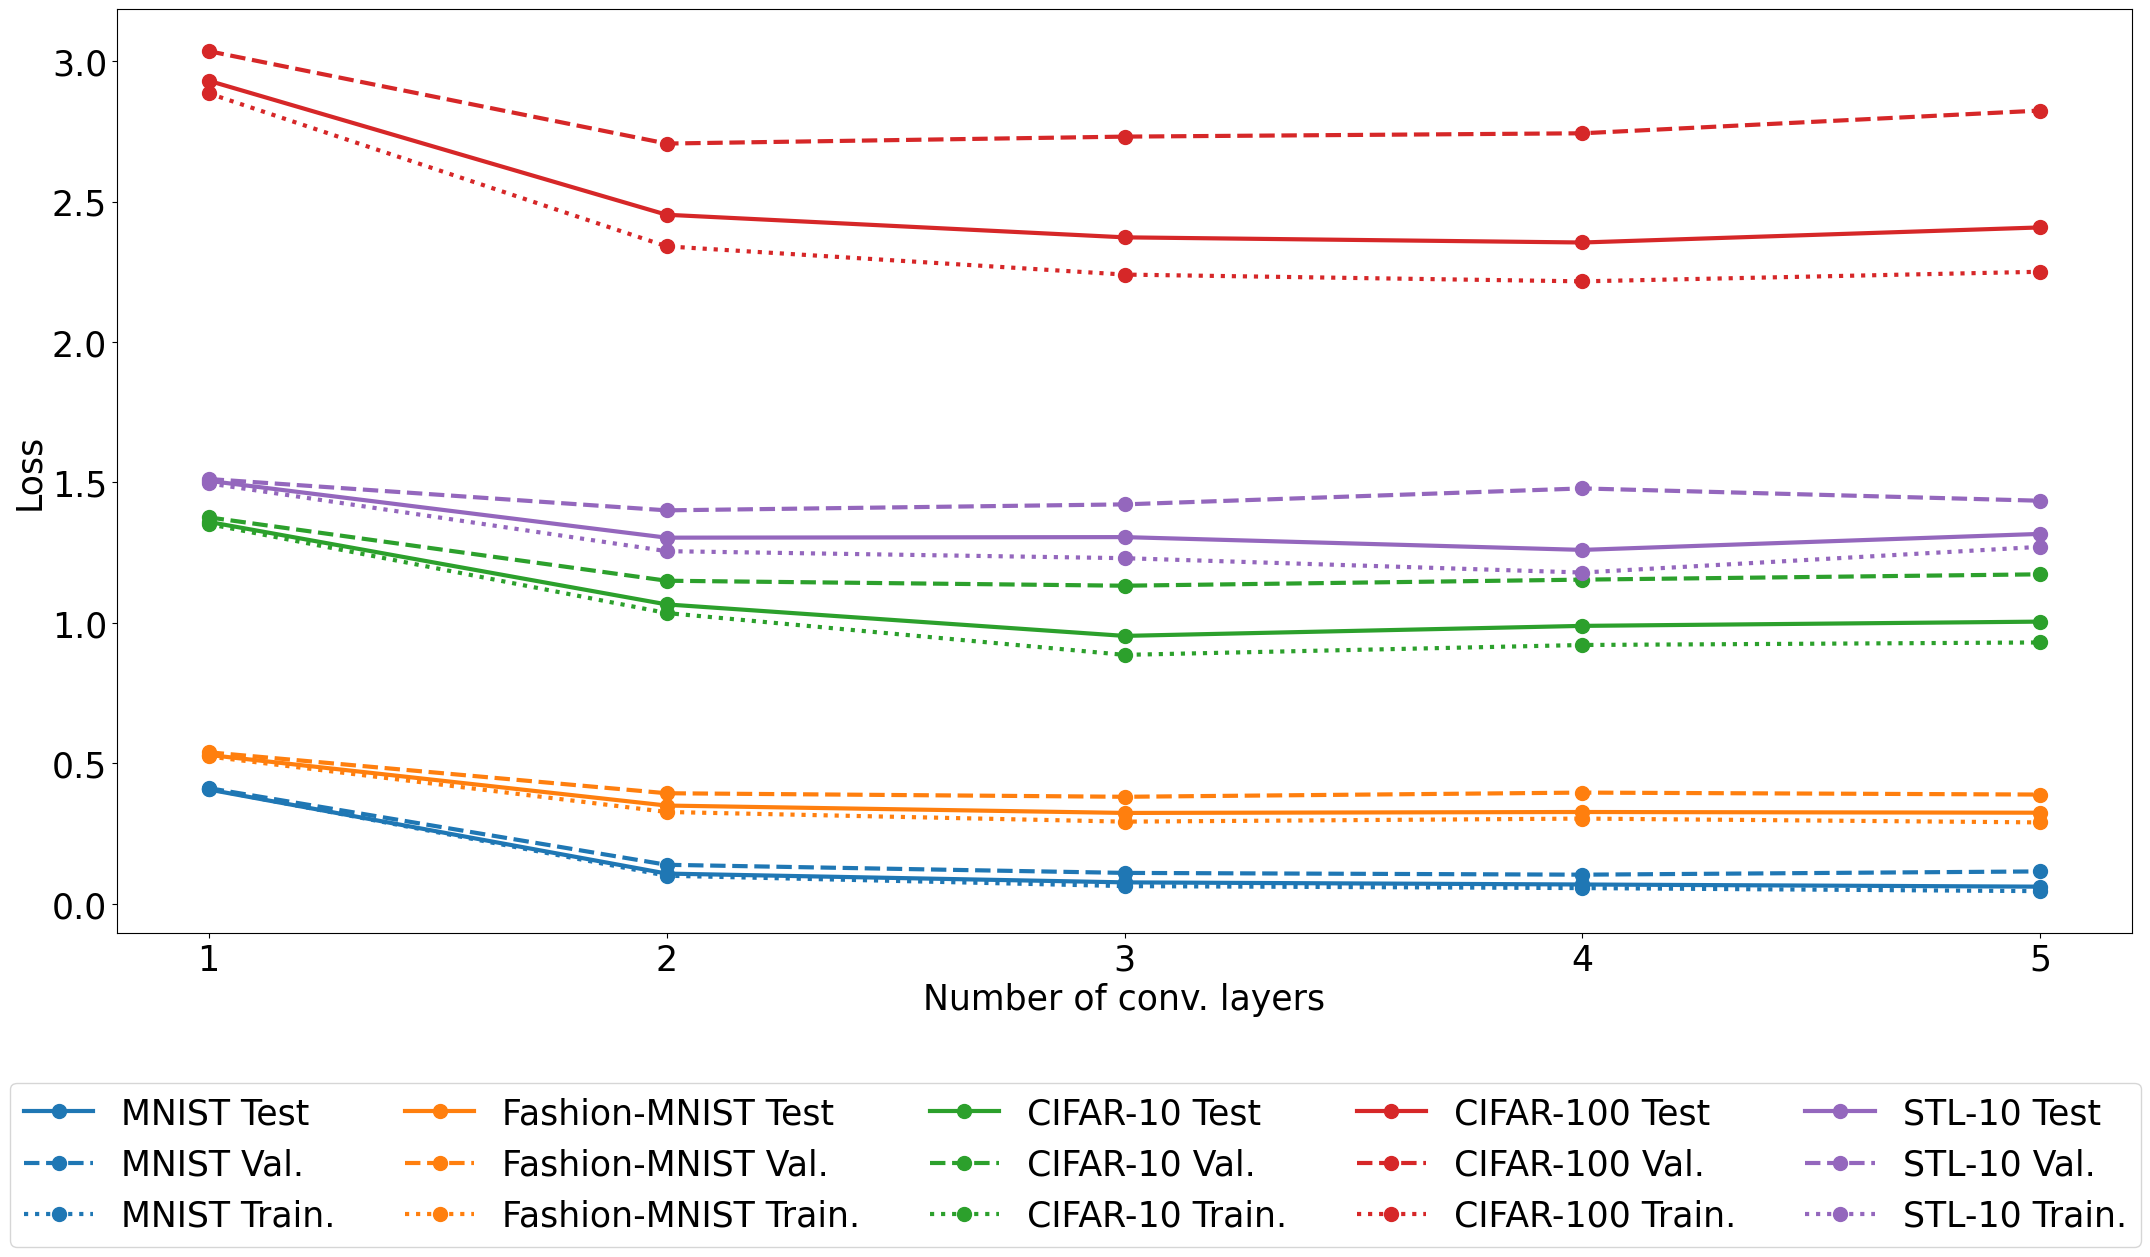

In [89]:
plot_result_test_val_train('loss', 'Loss')

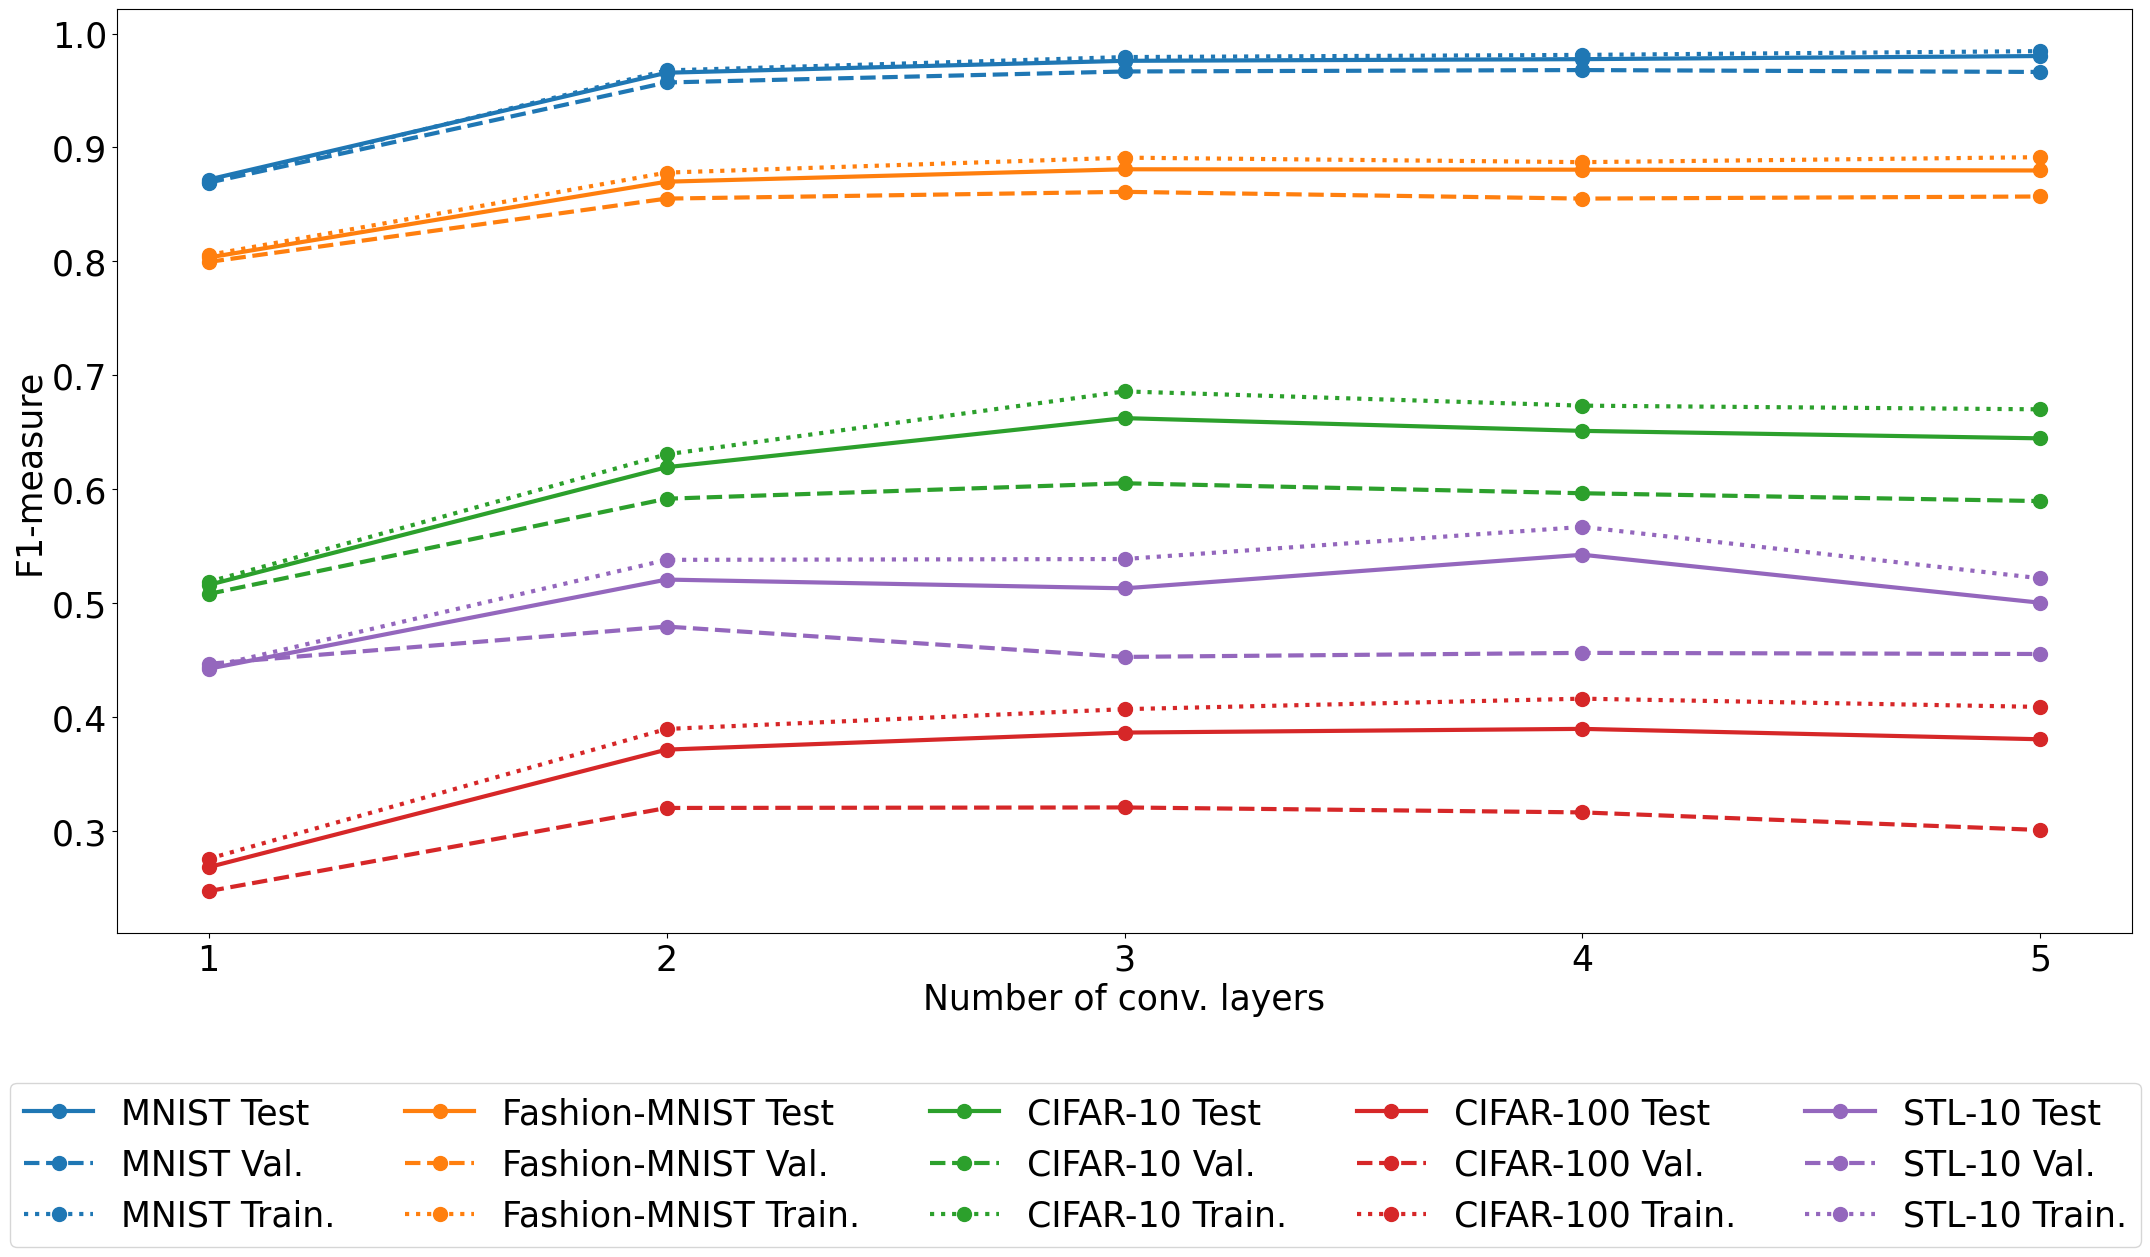

In [90]:
plot_result_test_val_train('f1 macro', 'F1-measure')

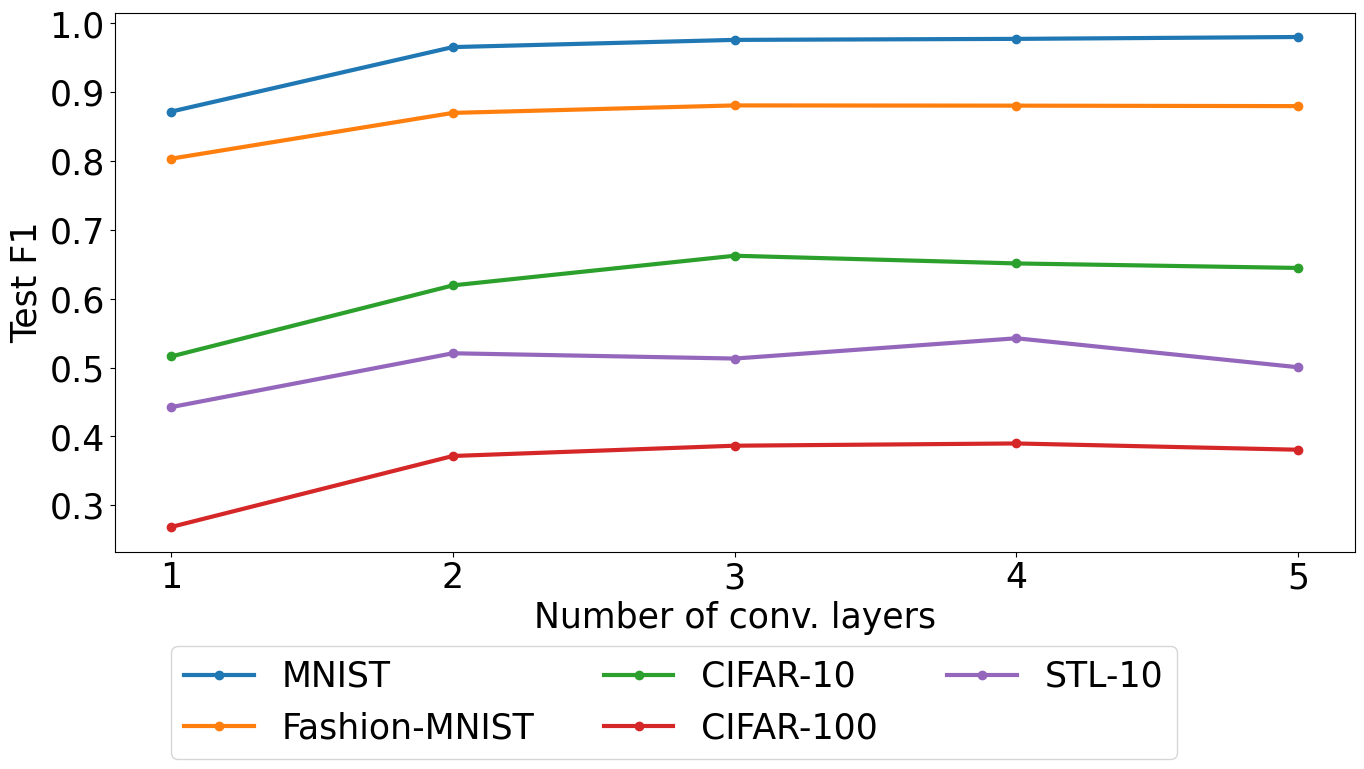

In [43]:
plot_result('f1 macro', 'Test F1')

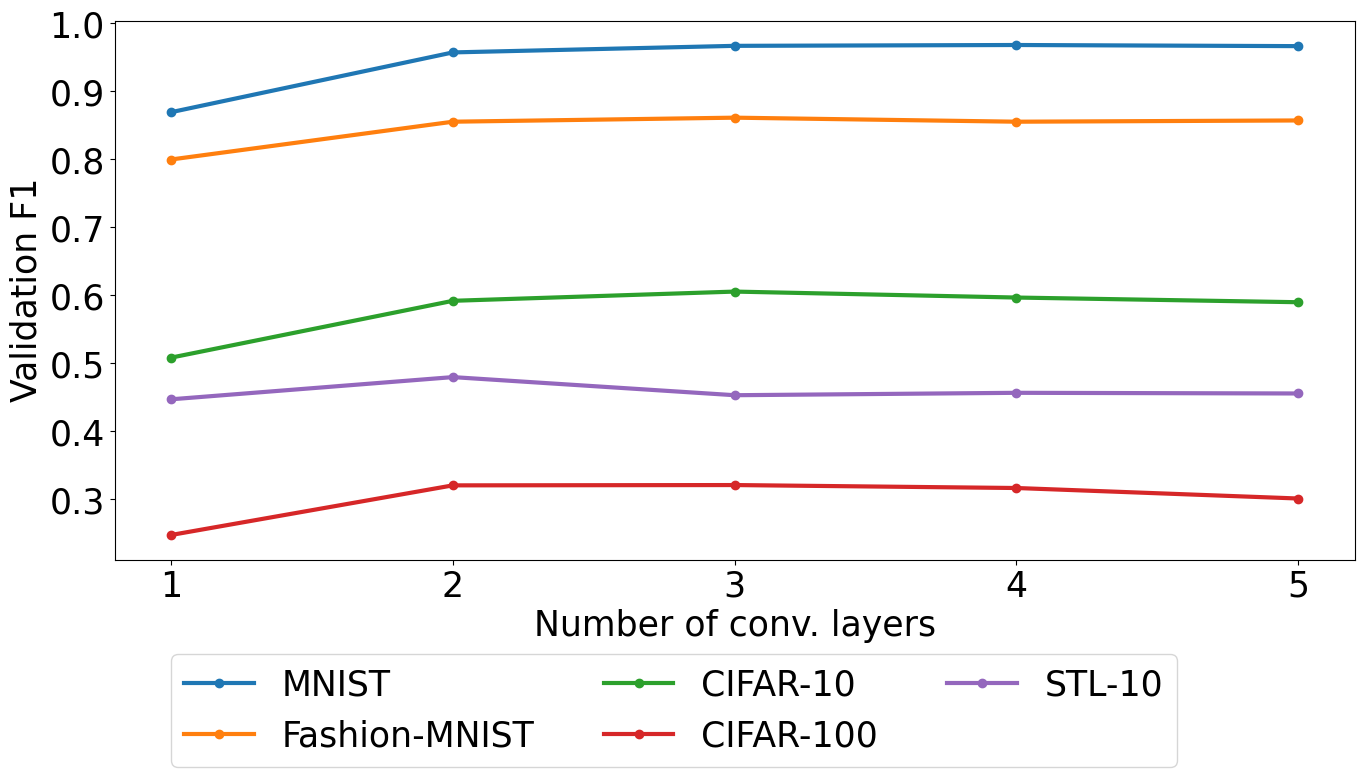

In [44]:
plot_result('validation f1 macro', 'Validation F1')

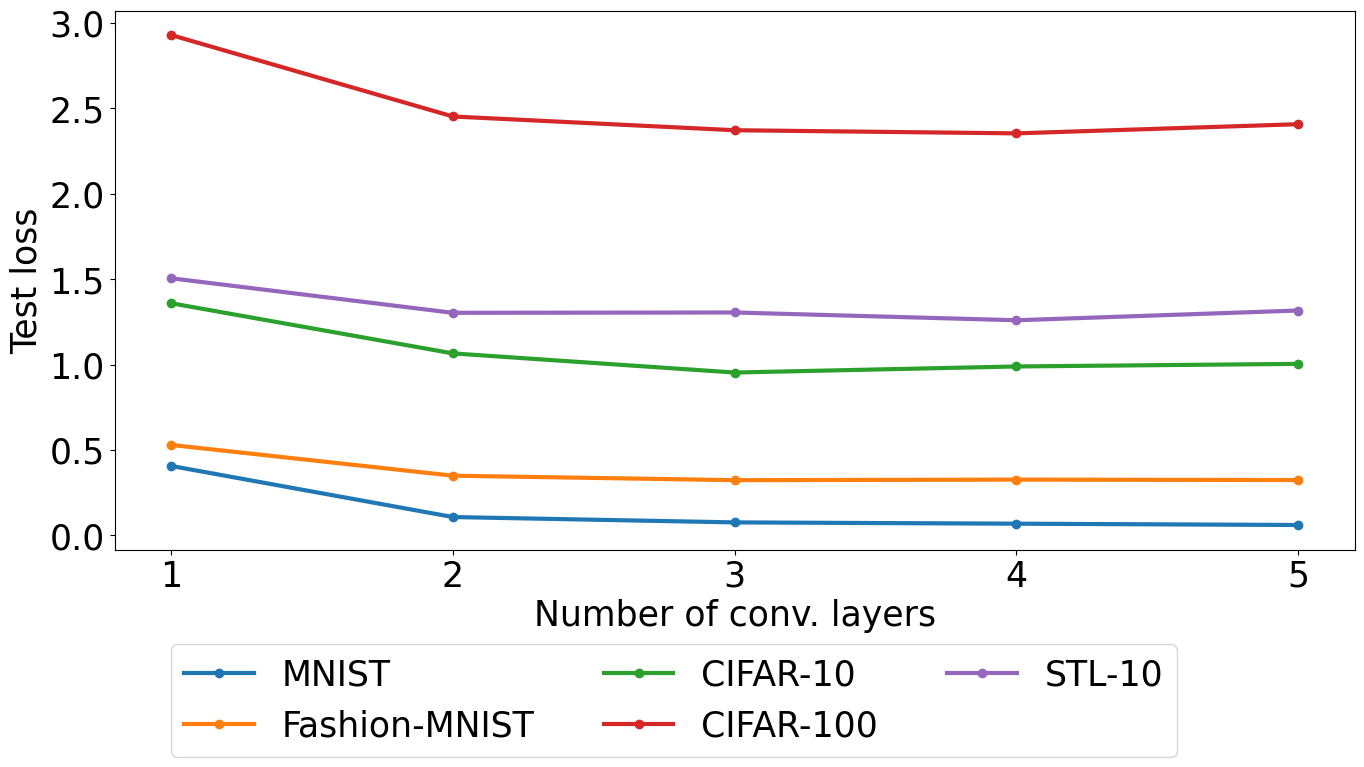

In [45]:
plot_result('loss', 'Test loss')

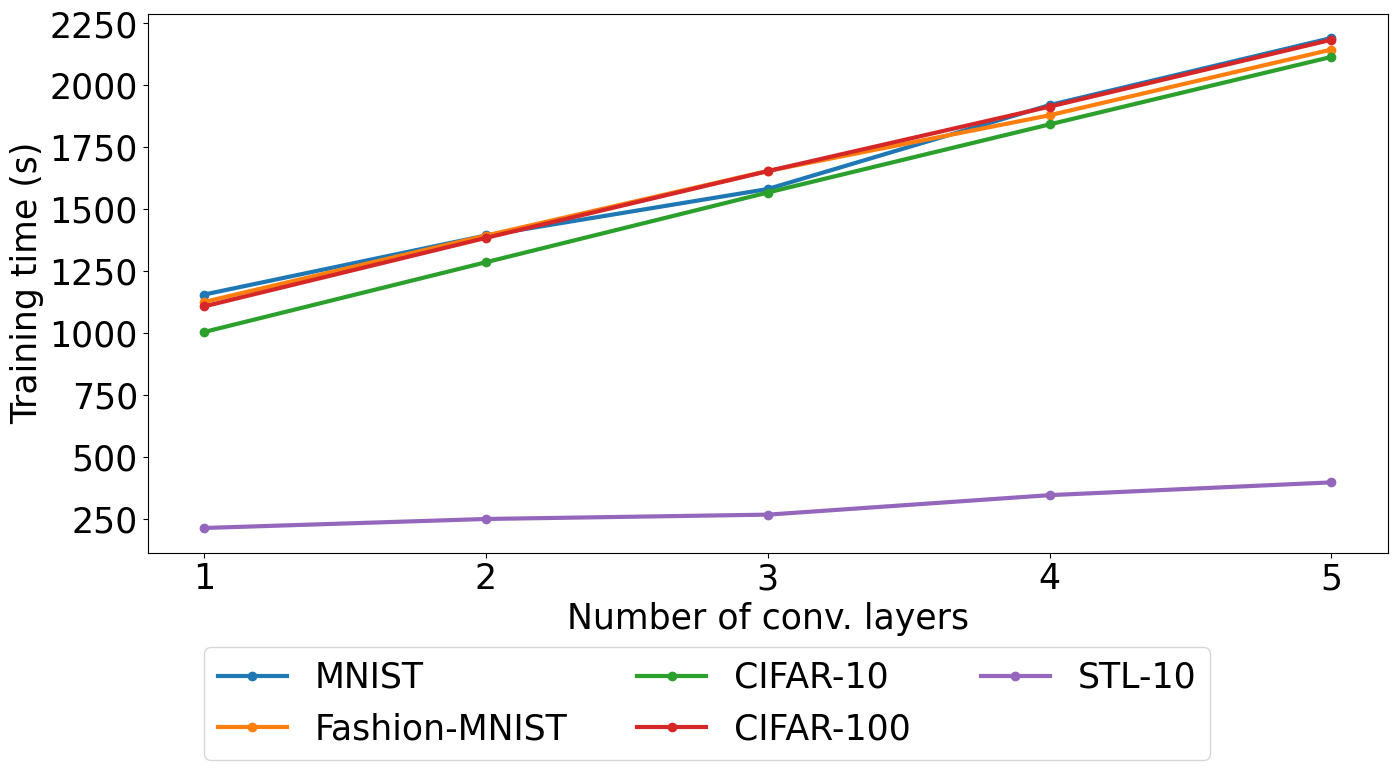

In [53]:
plot_result('training time', 'Training time (s)')

In [56]:
metrics = ['f1 macro', 'f1 micro', 'loss']
for dsi, ds in enumerate(dss):
    for li, l in enumerate(num_layers):
        if li == 0:
            line = f'\multirow{{{len(num_layers)}}}{{*}}{{{ds_pretty_names[ds]}}}&{l}'
        else:
            line = f'&{l}'
        
        for m in metrics:
            test_m      = meta_data[dsi, li, relevant_metrics[f'{m}']]
            test_m_stdv = meta_data[dsi, li, relevant_metrics[f'stdv {m}']]
            validation_m      = meta_data[dsi, li, relevant_metrics[f'validation {m}']]
            validation_m_stdv = meta_data[dsi, li, relevant_metrics[f'stdv validation {m}']]
            train_m      = meta_data[dsi, li, relevant_metrics[f'train {m}']]
            train_m_stdv = meta_data[dsi, li, relevant_metrics[f'stdv train {m}']]

            if m == 'loss':
                line += f"&{test_m:.3f}$\pm${test_m_stdv:.3f}"
                line += f"&{validation_m:.3f}$\pm${validation_m_stdv:.3f}"
                line += f"&{train_m:.3f}$\pm${train_m_stdv:.3f}"
            else:
                line += f"&{test_m*100:.1f}$\pm${test_m_stdv*100:.1f}"
                line += f"&{validation_m*100:.1f}$\pm${validation_m_stdv*100:.1f}"
                line += f"&{train_m*100:.1f}$\pm${train_m_stdv*100:.1f}"
        print(line + '\\\\')
    print('\\hline')

\multirow{5}{*}{MNIST}&1&87.2$\pm$1.2&86.9$\pm$1.6&87.0$\pm$1.1&87.3$\pm$1.1&87.0$\pm$1.5&87.1$\pm$1.1&0.407$\pm$0.037&0.412$\pm$0.046&0.409$\pm$0.034\\
&2&96.6$\pm$0.4&95.7$\pm$0.1&96.8$\pm$0.3&96.6$\pm$0.4&95.7$\pm$0.1&96.8$\pm$0.3&0.107$\pm$0.012&0.138$\pm$0.008&0.100$\pm$0.008\\
&3&97.6$\pm$0.2&96.7$\pm$0.2&97.9$\pm$0.3&97.6$\pm$0.2&96.7$\pm$0.2&97.9$\pm$0.3&0.076$\pm$0.011&0.110$\pm$0.011&0.063$\pm$0.008\\
&4&97.8$\pm$0.4&96.8$\pm$0.3&98.1$\pm$0.4&97.8$\pm$0.4&96.8$\pm$0.3&98.1$\pm$0.4&0.068$\pm$0.013&0.103$\pm$0.013&0.055$\pm$0.012\\
&5&98.0$\pm$0.7&96.6$\pm$0.4&98.5$\pm$0.3&98.0$\pm$0.7&96.7$\pm$0.4&98.5$\pm$0.3&0.061$\pm$0.026&0.115$\pm$0.012&0.045$\pm$0.008\\
\hline
\multirow{5}{*}{Fashion-MNIST}&1&80.3$\pm$1.6&80.0$\pm$1.2&80.6$\pm$1.6&80.6$\pm$1.4&80.3$\pm$1.0&80.8$\pm$1.3&0.530$\pm$0.036&0.539$\pm$0.026&0.524$\pm$0.033\\
&2&87.0$\pm$0.9&85.5$\pm$0.5&87.8$\pm$0.4&87.1$\pm$1.0&85.6$\pm$0.4&87.9$\pm$0.3&0.349$\pm$0.028&0.393$\pm$0.009&0.327$\pm$0.008\\
&3&88.1$\pm$1.6&86.1$\pm